# U-Net Semantic Segmentation Training Dataset
### QCar2 Autonomous Driving - Lane Segmentation

Este notebook demuestra:
- Carga del dataset preparado
- Visualización de máscaras de segmentación
- Overlay de segmentación sobre imágenes originales

## 1. Setup e Imports

In [1]:
!ls
!cd qcar2_LaneSeg-ACC/train_unet
!ls

isaac_ros_common	      isaac_ros_nitros	    qcar2_LaneSeg-ACC
isaac_ros_dnn_inference       qcar2_autonomy	    qcar2_nodes
isaac_ros_image_pipeline      qcar2_interfaces	    teleop_twist_keyboard
isaac_ros_image_segmentation  qcar2_lane_following
isaac_ros_common	      isaac_ros_nitros	    qcar2_LaneSeg-ACC
isaac_ros_dnn_inference       qcar2_autonomy	    qcar2_nodes
isaac_ros_image_pipeline      qcar2_interfaces	    teleop_twist_keyboard
isaac_ros_image_segmentation  qcar2_lane_following


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import random
import sys
import os
dir=sys.path.append("qcar2_LaneSeg-ACC/train_unet")
!ls
# Import local modules
import config
from prepare_dataset import visualize_mask, overlay_mask_on_image

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

print("✅ Imports successful!")
print(f"Number of classes: {config.NUM_CLASSES}")

isaac_ros_common	      isaac_ros_nitros	    qcar2_LaneSeg-ACC
isaac_ros_dnn_inference       qcar2_autonomy	    qcar2_nodes
isaac_ros_image_pipeline      qcar2_interfaces	    teleop_twist_keyboard
isaac_ros_image_segmentation  qcar2_lane_following
✅ Imports successful!
Number of classes: 4


## 2. Class Configuration

In [3]:
# Display class mapping
print("Semantic Segmentation Classes:\n")
for class_id in range(config.NUM_CLASSES):
    class_name = config.get_class_name(class_id)
    color_rgb = config.get_class_color(class_id, bgr=False)
    print(f"  Clase {class_id}: {class_name}")
    print(f"    RGB: {color_rgb}\n")

Semantic Segmentation Classes:

  Clase 0: Fondo / Vereda / Obstáculos
    RGB: (0, 0, 0)

  Clase 1: Camino / Asfalto transitable
    RGB: (0, 0, 255)

  Clase 2: Líneas de tráfico
    RGB: (255, 255, 0)

  Clase 3: Bordes de camino
    RGB: (255, 0, 0)



## 3. Color Legend Visualization

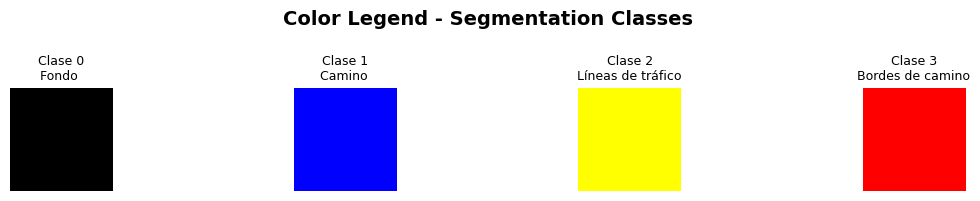

In [4]:
# Create color legend
fig, axes = plt.subplots(1, config.NUM_CLASSES, figsize=(12, 2))

for class_id in range(config.NUM_CLASSES):
    color_rgb = config.get_class_color(class_id, bgr=False)
    class_name = config.get_class_name(class_id)
    
    # Create solid color patch
    color_patch = np.ones((50, 50, 3), dtype=np.uint8)
    color_patch[:, :] = color_rgb
    
    # Display
    axes[class_id].imshow(color_patch)
    axes[class_id].set_title(f"Clase {class_id}\n{class_name.split('/')[0]}", fontsize=9)
    axes[class_id].axis('off')

plt.suptitle('Color Legend - Segmentation Classes', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 4. Load Dataset

In [5]:
# Dataset paths
print(dir)
!ls
dataset_base = Path("qcar2_LaneSeg-ACC/train_unet/training_data/dataset_images")

train_images_path = dataset_base / 'train' / 'images'
train_masks_path = dataset_base / 'train' / 'masks'

# Get list of files
if train_images_path.exists():
    image_files = sorted(list(train_images_path.glob('*.png')))
    mask_files = sorted(list(train_masks_path.glob('*.png')))
    
    print(f"📁 Found {len(image_files)} training images")
    print(f"📁 Found {len(mask_files)} training masks")
    
    if len(image_files) != len(mask_files):
        print("⚠️  Warning: Number of images and masks do not match!")
else:
    print("❌ Dataset not found! Run prepare_dataset.py first.")
    image_files = []
    mask_files = []

None
isaac_ros_common	      isaac_ros_nitros	    qcar2_LaneSeg-ACC
isaac_ros_dnn_inference       qcar2_autonomy	    qcar2_nodes
isaac_ros_image_pipeline      qcar2_interfaces	    teleop_twist_keyboard
isaac_ros_image_segmentation  qcar2_lane_following
📁 Found 10 training images
📁 Found 10 training masks


## 5. Visualize Random Sample

Sample 2: img_00002.png
Image shape: (480, 640, 3)
Mask shape: (480, 640)
Classes present: [0 1 2 3]


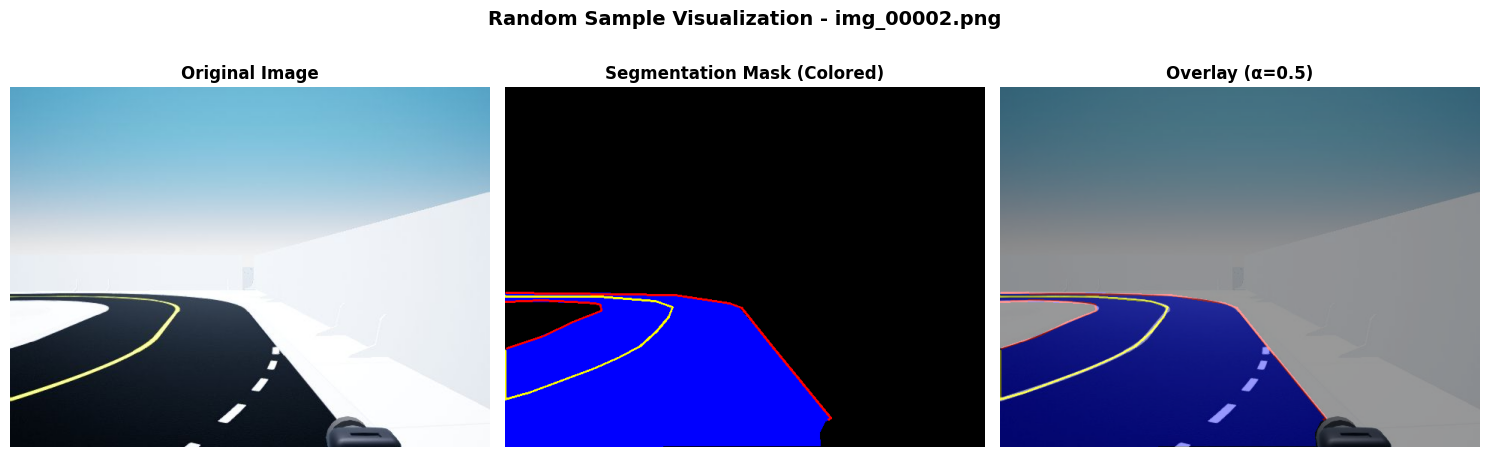

In [6]:
if image_files:
    # Select random sample
    idx = random.randint(0, len(image_files) - 1)
    
    # Load image and mask
    image = cv2.imread(str(image_files[idx]))
    mask = cv2.imread(str(mask_files[idx]), cv2.IMREAD_GRAYSCALE)
    
    # Check unique classes in this mask
    unique_classes = np.unique(mask)
    print(f"Sample {idx + 1}: {image_files[idx].name}")
    print(f"Image shape: {image.shape}")
    print(f"Mask shape: {mask.shape}")
    print(f"Classes present: {unique_classes}")
    
    # Create visualizations
    colored_mask = visualize_mask(mask, use_colors=True)
    overlay = overlay_mask_on_image(image, mask, alpha=0.4)
    
    # Plot
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Original image
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image', fontsize=12, fontweight='bold')
    axes[0].axis('off')
    
    # Colored mask
    axes[1].imshow(cv2.cvtColor(colored_mask, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Segmentation Mask (Colored)', fontsize=12, fontweight='bold')
    axes[1].axis('off')
    
    # Overlay
    axes[2].imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    axes[2].set_title('Overlay (α=0.5)', fontsize=12, fontweight='bold')
    axes[2].axis('off')
    
    plt.suptitle(f'Random Sample Visualization - {image_files[idx].name}', 
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("❌ No images to display")

## 6. Class Distribution Analysis

Analyzing class distribution...


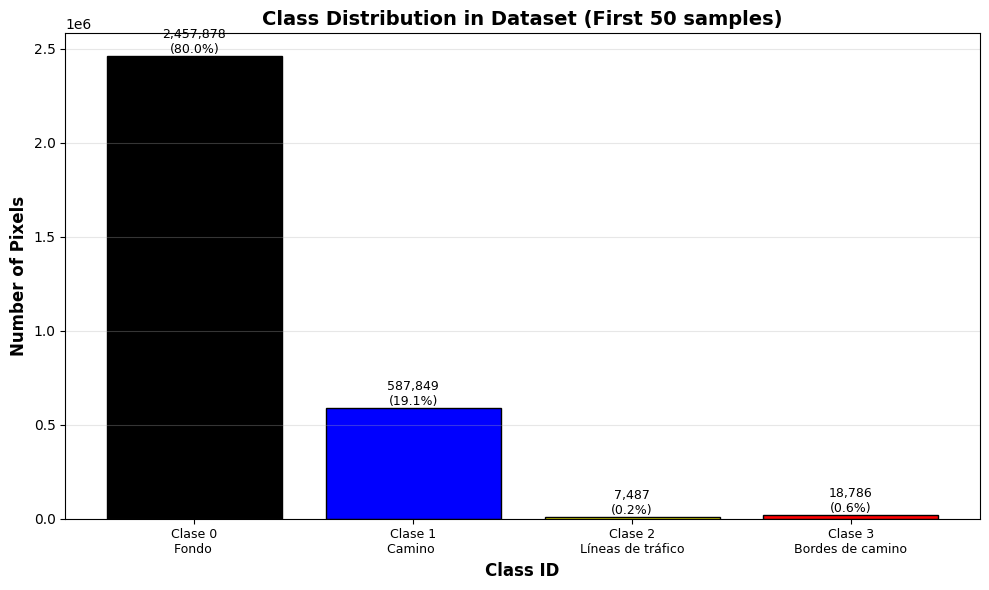


Class Distribution Summary:
  Clase 0: 2,457,878 pixels (80.01%)
  Clase 1: 587,849 pixels (19.14%)
  Clase 2: 7,487 pixels (0.24%)
  Clase 3: 18,786 pixels (0.61%)


In [7]:
if mask_files:
    # Count pixels per class across all masks
    class_counts = np.zeros(config.NUM_CLASSES, dtype=np.int64)
    
    print("Analyzing class distribution...")
    for mask_file in mask_files[:50]:  # Analyze first 50 for speed
        mask = cv2.imread(str(mask_file), cv2.IMREAD_GRAYSCALE)
        for class_id in range(config.NUM_CLASSES):
            class_counts[class_id] += np.sum(mask == class_id)
    
    # Plot distribution
    fig, ax = plt.subplots(figsize=(10, 6))
    
    colors = []
    labels = []
    for class_id in range(config.NUM_CLASSES):
        color_rgb = np.array(config.get_class_color(class_id, bgr=False)) / 255.0
        colors.append(color_rgb)
        labels.append(f"Clase {class_id}\n{config.get_class_name(class_id).split('/')[0]}")
    
    bars = ax.bar(range(config.NUM_CLASSES), class_counts, color=colors, edgecolor='black')
    ax.set_xlabel('Class ID', fontsize=12, fontweight='bold')
    ax.set_ylabel('Number of Pixels', fontsize=12, fontweight='bold')
    ax.set_title('Class Distribution in Dataset (First 50 samples)', fontsize=14, fontweight='bold')
    ax.set_xticks(range(config.NUM_CLASSES))
    ax.set_xticklabels(labels, fontsize=9)
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, (bar, count) in enumerate(zip(bars, class_counts)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{count:,}\n({count/class_counts.sum()*100:.1f}%)',
                ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    print("\nClass Distribution Summary:")
    for class_id in range(config.NUM_CLASSES):
        percentage = class_counts[class_id] / class_counts.sum() * 100
        print(f"  Clase {class_id}: {class_counts[class_id]:,} pixels ({percentage:.2f}%)")
else:
    print("❌ No masks to analyze")

## 7. Multiple Random Samples Grid

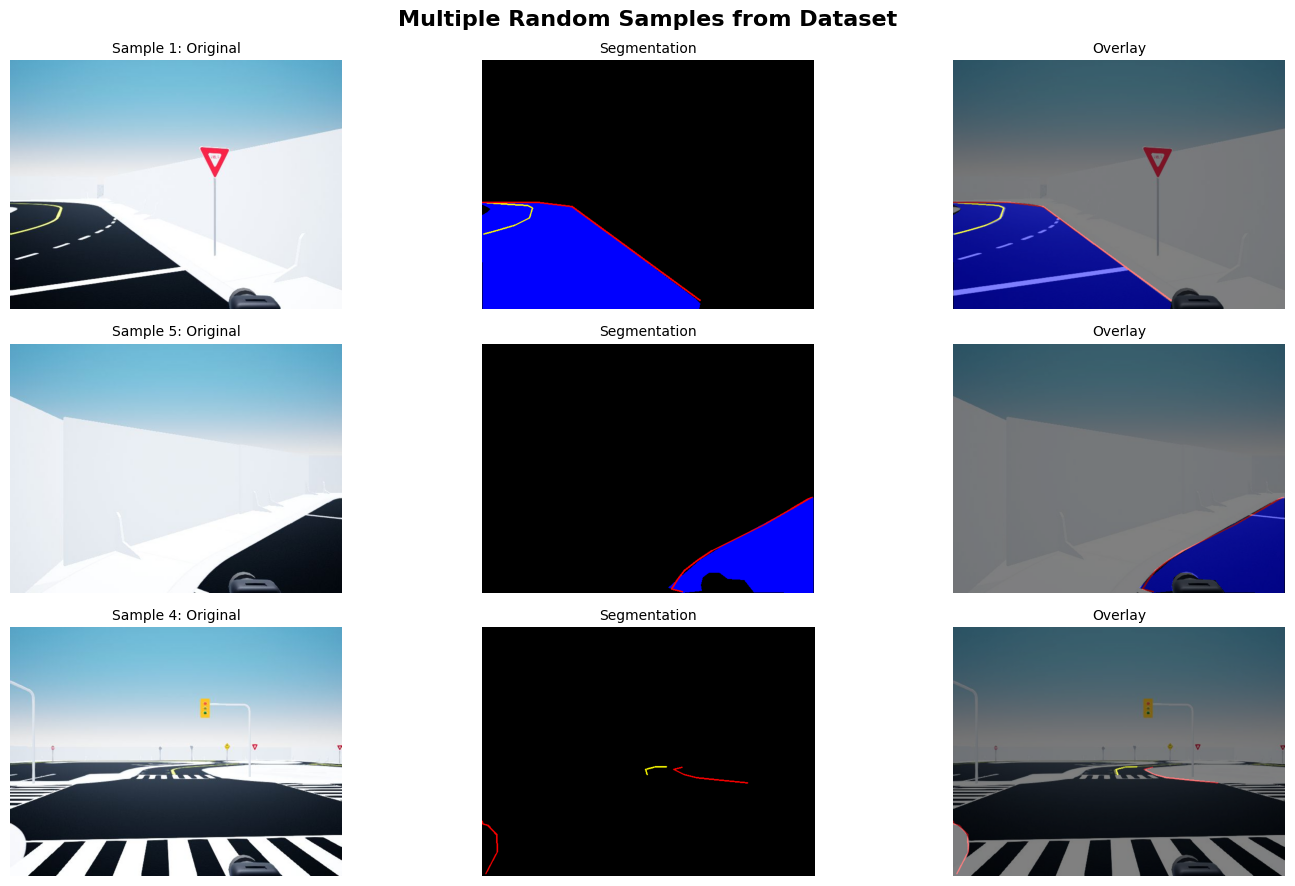

In [8]:
if image_files and len(image_files) >= 2:
    # Select 6 random samples
    num_samples = 3
    random_indices = random.sample(range(len(image_files)), num_samples)
    
    fig, axes = plt.subplots(num_samples, 3, figsize=(15, num_samples * 3))
    
    for i, idx in enumerate(random_indices):
        # Load data
        image = cv2.imread(str(image_files[idx]))
        mask = cv2.imread(str(mask_files[idx]), cv2.IMREAD_GRAYSCALE)
        
        # Create visualizations
        colored_mask = visualize_mask(mask, use_colors=True)
        overlay = overlay_mask_on_image(image, mask, alpha=0.5)
        
        # Plot row
        axes[i, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[i, 0].set_title(f'Sample {idx + 1}: Original', fontsize=10)
        axes[i, 0].axis('off')
        
        axes[i, 1].imshow(cv2.cvtColor(colored_mask, cv2.COLOR_BGR2RGB))
        axes[i, 1].set_title('Segmentation', fontsize=10)
        axes[i, 1].axis('off')
        
        axes[i, 2].imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
        axes[i, 2].set_title('Overlay', fontsize=10)
        axes[i, 2].axis('off')
    
    plt.suptitle('Multiple Random Samples from Dataset', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("❌ Not enough images for grid visualization")

## 8. Dataset Summary

In [9]:
print("="*60)
print("DATASET SUMMARY")
print("="*60)

if image_files:
    sample_image = cv2.imread(str(image_files[0]))
    height, width = sample_image.shape[:2]
    
    print(f"\n📊 Dataset Statistics:")
    print(f"  Training samples: {len(image_files)}")
    print(f"  Image dimensions: {width}x{height}")
    print(f"  Number of classes: {config.NUM_CLASSES}")
    print(f"\n🎨 Color Mapping:")
    for class_id in range(config.NUM_CLASSES):
        name = config.get_class_name(class_id)
        color = config.get_class_color(class_id, bgr=False)
        print(f"  Clase {class_id}: {name} → RGB{color}")
    print(f"\n💡 Tip: Use these functions for visualization:")
    print(f"  - visualize_mask(mask, use_colors=True)")
    print(f"  - overlay_mask_on_image(image, mask, alpha=0.5)")
else:
    print("\n❌ No dataset found. Run prepare_dataset.py first.")

print("\n" + "="*60)

DATASET SUMMARY

📊 Dataset Statistics:
  Training samples: 10
  Image dimensions: 640x480
  Number of classes: 4

🎨 Color Mapping:
  Clase 0: Fondo / Vereda / Obstáculos → RGB(0, 0, 0)
  Clase 1: Camino / Asfalto transitable → RGB(0, 0, 255)
  Clase 2: Líneas de tráfico → RGB(255, 255, 0)
  Clase 3: Bordes de camino → RGB(255, 0, 0)

💡 Tip: Use these functions for visualization:
  - visualize_mask(mask, use_colors=True)
  - overlay_mask_on_image(image, mask, alpha=0.5)



## TRAIN_UNET

In [10]:
# ============================================================================
# CELDA 1: IMPORTS
# Copiar/pegar esta celda al inicio del notebook después de las celdas existentes
# ============================================================================

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import random
from tqdm import tqdm
import sys
import os

# Agregar path al módulo local
sys.path.append('.')

# Importar módulos locales
import config
from prepare_dataset import visualize_mask, overlay_mask_on_image

# Configurar semillas para reproducibilidad
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

print("✅ Imports exitosos!")


✅ Imports exitosos!


In [ ]:
# ============================================================================
# CELDA 2: HIPERPARÁMETROS
# ============================================================================

# Hiperparámetros de entrenamiento
BATCH_SIZE = 2
LEARNING_RATE = 1e-3
NUM_EPOCHS = 150  # Ajustable entre 20-50

# Dimensiones de imagen (CRÍTICO para Isaac ROS)
IMAGE_HEIGHT = 480
IMAGE_WIDTH = 640

# Número de clases de segmentación  
NUM_CLASSES = 4

# Dispositivo (GPU si está disponible)
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Rutas de datos
DATASET_BASE = Path("qcar2_LaneSeg-ACC/train_unet/training_data/dataset_images")
TRAIN_IMAGES_PATH = DATASET_BASE / 'train' / 'images'
TRAIN_MASKS_PATH = DATASET_BASE / 'train' / 'masks'
VAL_IMAGES_PATH = DATASET_BASE / 'val' / 'images'
VAL_MASKS_PATH = DATASET_BASE / 'val' / 'masks'

# Pesos de clase para CrossEntropyLoss
# [fondo, camino, líneas, bordes]
CLASS_WEIGHTS = torch.tensor([0.1, 1.0, 10.0, 1.0]).to(DEVICE)

print(f"✅ Configuración:")
print(f"   - Device: {DEVICE}")
print(f"   - Batch size: {BATCH_SIZE}")
print(f"   - Learning rate: {LEARNING_RATE}")
print(f"   - Épocas: {NUM_EPOCHS}")
print(f"   - Resolución: {IMAGE_WIDTH}x{IMAGE_HEIGHT}")
print(f"   - Clases: {NUM_CLASSES}")


✅ Configuración:
   - Device: cuda
   - Batch size: 2
   - Learning rate: 0.001
   - Épocas: 150
   - Resolución: 640x480
   - Clases: 4


In [12]:
# ============================================================================
# CELDA 3: DATASET Y DATALOADERS
# ============================================================================

class SegmentationDataset(Dataset):
    """
    Dataset personalizado para segmentación semántica de carriles.
    
    Args:
        images_dir: Directorio con imágenes RGB
        masks_dir: Directorio con máscaras de segmentación
        transform: Transformaciones a aplicar (opcional)
    """
    
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = Path(images_dir)
        self.masks_dir = Path(masks_dir)
        self.transform = transform
        
        # Listar archivos de imágenes
        self.image_files = sorted(list(self.images_dir.glob('*.png')))
        self.mask_files = sorted(list(self.masks_dir.glob('*.png')))
        
        # Verificar que coincidan
        assert len(self.image_files) == len(self.mask_files), \
            f"Número de imágenes ({len(self.image_files)}) != número de máscaras ({len(self.mask_files)})"
        
        print(f"✅ Dataset inicializado: {len(self.image_files)} muestras")
    
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, idx):
        # Cargar imagen (RGB)
        image_path = self.image_files[idx]
        image = cv2.imread(str(image_path))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR -> RGB
        
        # Cargar máscara (escala de grises)
        mask_path = self.mask_files[idx]
        mask = cv2.imread(str(mask_path), cv2.IMREAD_GRAYSCALE)
        
        # Aplicar transformaciones
        if self.transform:
            # Resize obligatorio a 640x480 (Isaac ROS)
            image = cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT), 
                             interpolation=cv2.INTER_LINEAR)
            mask = cv2.resize(mask, (IMAGE_WIDTH, IMAGE_HEIGHT), 
                            interpolation=cv2.INTER_NEAREST)
        
        # Normalizar imagen a [0, 1]
        image = image.astype(np.float32) / 255.0
        
        # Convertir a tensores
        image = torch.from_numpy(image).permute(2, 0, 1)  # HWC -> CHW
        mask = torch.from_numpy(mask).long()  # Importante: usar long/int64
        
        return image, mask


# Crear datasets
print("\n📂 Creando datasets...")
train_dataset = SegmentationDataset(TRAIN_IMAGES_PATH, TRAIN_MASKS_PATH, transform=True)
val_dataset = SegmentationDataset(VAL_IMAGES_PATH, VAL_MASKS_PATH, transform=True)

# Crear dataloaders
train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2,
    pin_memory=True if torch.cuda.is_available() else False
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2,
    pin_memory=True if torch.cuda.is_available() else False
)

print(f"✅ DataLoaders creados:")
print(f"   - Train batches: {len(train_loader)}")
print(f"   - Val batches: {len(val_loader)}")



📂 Creando datasets...
✅ Dataset inicializado: 10 muestras
✅ Dataset inicializado: 16 muestras
✅ DataLoaders creados:
   - Train batches: 5
   - Val batches: 8


In [13]:
# ============================================================================
# CELDA 4: MODELO OPTIMIZED U-NET
# ============================================================================

class DoubleConv(nn.Module):
    """Bloque de doble convolución: (Conv -> BatchNorm -> ReLU) x 2"""
    
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )
    
    def forward(self, x):
        return self.double_conv(x)


class Down(nn.Module):
    """Bloque de downsampling: MaxPool -> DoubleConv"""
    
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )
    
    def forward(self, x):
        return self.maxpool_conv(x)


class Up(nn.Module):
    """Bloque de upsampling: ConvTranspose -> Concat -> DoubleConv"""
    
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.up = nn.ConvTranspose2d(in_channels, in_channels // 2, kernel_size=2, stride=2)
        self.conv = DoubleConv(in_channels, out_channels)
    
    def forward(self, x1, x2):
        x1 = self.up(x1)
        
        # Asegurar dimensiones compatibles para concatenación
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]
        
        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                       diffY // 2, diffY - diffY // 2])
        
        # Concatenar con skip connection
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)


class OptimizedUNet(nn.Module):
    """
    Arquitectura U-Net optimizada para segmentación semántica de carriles.
    
    Args:
        in_channels: Número de canales de entrada (3 para RGB)
        num_classes: Número de clases de segmentación (4: fondo, camino, líneas, bordes)
    """
    
    def __init__(self, in_channels=3, num_classes=4):
        super().__init__()
        
        # Encoder (contracting path)
        self.inc = DoubleConv(in_channels, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 512)
        
        # Bottleneck (Cuello de botella)
        self.down4 = Down(512, 512)
        
        # Decoder (expansive path) - AJUSTADO CON PARCHES DE CANALES
        
        # up1: Recibe 512. Upsample a 256. Concatena con down3 (512). Total entrada = 768
        self.up1 = Up(512, 256)
        self.up1.conv = DoubleConv(768, 256) # Parche manual
        
        # up2: Recibe 256. Upsample a 128. Concatena con down2 (256). Total entrada = 384
        self.up2 = Up(256, 128)
        self.up2.conv = DoubleConv(384, 128) # Parche manual

        # up3: Recibe 128. Upsample a 64. Concatena con down1 (128). Total entrada = 192
        self.up3 = Up(128, 64)
        self.up3.conv = DoubleConv(192, 64) # Parche manual

        # up4: Recibe 64. Upsample a 32. Concatena con inc (64). Total entrada = 96
        self.up4 = Up(64, 64)
        self.up4.conv = DoubleConv(96, 64) # Parche manual
        
        # Capa final de clasificación
        self.outc = nn.Conv2d(64, num_classes, kernel_size=1)
    
    def forward(self, x):
        # Encoder
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        
        # Decoder con skip connections
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        
        # Salida
        logits = self.outc(x)
        return logits


# Crear modelo y mover a dispositivo
print("\n🧠 Creando modelo OptimizedUNet...")
model = OptimizedUNet(in_channels=3, num_classes=NUM_CLASSES).to(DEVICE)

# Contar parámetros
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"✅ Modelo creado:")
print(f"   - Parámetros totales: {total_params:,}")
print(f"   - Parámetros entrenables: {trainable_params:,}")



🧠 Creando modelo OptimizedUNet...
✅ Modelo creado:
   - Parámetros totales: 13,295,780
   - Parámetros entrenables: 13,295,780


In [14]:
# ============================================================================
# CELDA 5: FUNCIONES DE ENTRENAMIENTO Y VALIDACIÓN
# ============================================================================

# Función de pérdida con pesos de clase
criterion = nn.CrossEntropyLoss(weight=CLASS_WEIGHTS)

# Optimizador
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Scheduler (opcional, reduce LR cuando la validación se estanca)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=5, verbose=True
)


def calculate_pixel_accuracy(pred, target):
    """
    Calcula accuracy de píxeles.
    
    Args:
        pred: Predicciones del modelo (B, C, H, W)
        target: Máscaras ground truth (B, H, W)
    
    Returns:
        Accuracy promedio del batch
    """
    pred = torch.argmax(pred, dim=1)  # Obtener clase predicha
    correct = (pred == target).float()
    accuracy = correct.sum() / correct.numel()
    return accuracy.item()


def calculate_iou(pred, target, num_classes):
    """
    Calcula IoU (Intersection over Union) por clase.
    
    Args:
        pred: Predicciones del modelo (B, C, H, W)
        target: Máscaras ground truth (B, H, W)
        num_classes: Número de clases
    
    Returns:
        IoU promedio y IoU por clase
    """
    pred = torch.argmax(pred, dim=1)
    ious = []
    
    for cls in range(num_classes):
        pred_cls = (pred == cls)
        target_cls = (target == cls)
        
        intersection = (pred_cls & target_cls).float().sum()
        union = (pred_cls | target_cls).float().sum()
        
        if union == 0:
            iou = float('nan')
        else:
            iou = (intersection / union).item()
        
        ious.append(iou)
    
    # Mean IoU (ignorando clases sin píxeles)
    valid_ious = [iou for iou in ious if not np.isnan(iou)]
    mean_iou = np.mean(valid_ious) if valid_ious else 0.0
    
    return mean_iou, ious


def train_epoch(model, dataloader, criterion, optimizer, device):
    """
    Entrena el modelo por una época.
    
    Returns:
        Diccionario con métricas promedio
    """
    model.train()
    
    running_loss = 0.0
    running_acc = 0.0
    running_iou = 0.0
    
    pbar = tqdm(dataloader, desc='Training')
    for images, masks in pbar:
        images = images.to(device)
        masks = masks.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, masks)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Métricas
        acc = calculate_pixel_accuracy(outputs, masks)
        miou, _ = calculate_iou(outputs, masks, NUM_CLASSES)
        
        running_loss += loss.item()
        running_acc += acc
        running_iou += miou
        
        # Actualizar barra de progreso
        pbar.set_postfix({
            'loss': f'{loss.item():.4f}',
            'acc': f'{acc:.4f}',
            'mIoU': f'{miou:.4f}'
        })
    
    # Promedios
    epoch_loss = running_loss / len(dataloader)
    epoch_acc = running_acc / len(dataloader)
    epoch_iou = running_iou / len(dataloader)
    
    return {
        'loss': epoch_loss,
        'accuracy': epoch_acc,
        'mIoU': epoch_iou
    }


def validate_epoch(model, dataloader, criterion, device):
    """
    Valida el modelo en el conjunto de validación.
    
    Returns:
        Diccionario con métricas promedio
    """
    model.eval()
    
    running_loss = 0.0
    running_acc = 0.0
    running_iou = 0.0
    
    with torch.no_grad():
        pbar = tqdm(dataloader, desc='Validation')
        for images, masks in pbar:
            images = images.to(device)
            masks = masks.to(device)
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, masks)
            
            # Métricas
            acc = calculate_pixel_accuracy(outputs, masks)
            miou, _ = calculate_iou(outputs, masks, NUM_CLASSES)
            
            running_loss += loss.item()
            running_acc += acc
            running_iou += miou
            
            # Actualizar barra de progreso
            pbar.set_postfix({
                'loss': f'{loss.item():.4f}',
                'acc': f'{acc:.4f}',
                'mIoU': f'{miou:.4f}'
            })
    
    # Promedios
    epoch_loss = running_loss / len(dataloader)
    epoch_acc = running_acc / len(dataloader)
    epoch_iou = running_iou / len(dataloader)
    
    return {
        'loss': epoch_loss,
        'accuracy': epoch_acc,
        'mIoU': epoch_iou
    }


print("✅ Funciones de entrenamiento definidas")


✅ Funciones de entrenamiento definidas



🚀 Iniciando entrenamiento por 150 épocas...

Época 1/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.16it/s, loss=1.3621, acc=0.8282, mIoU=0.2071]



📊 Resumen Época 1:
   Train - Loss: 0.7001, Acc: 0.6922, mIoU: 0.3719
   Val   - Loss: 1.3642, Acc: 0.7904, mIoU: 0.2067
   ✅ Mejor modelo guardado! (Val Loss: 1.3642)

Época 2/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.25it/s, loss=1.1830, acc=0.9258, mIoU=0.3866]



📊 Resumen Época 2:
   Train - Loss: 0.4970, Acc: 0.9277, mIoU: 0.5170
   Val   - Loss: 1.1741, Acc: 0.9193, mIoU: 0.4117
   ✅ Mejor modelo guardado! (Val Loss: 1.1741)

Época 3/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.20it/s, loss=0.8687, acc=0.9267, mIoU=0.3969]



📊 Resumen Época 3:
   Train - Loss: 0.3620, Acc: 0.9334, mIoU: 0.5537
   Val   - Loss: 0.8104, Acc: 0.9587, mIoU: 0.4686
   ✅ Mejor modelo guardado! (Val Loss: 0.8104)

Época 4/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.34it/s, loss=0.6723, acc=0.9277, mIoU=0.4014]



📊 Resumen Época 4:
   Train - Loss: 0.3260, Acc: 0.9349, mIoU: 0.5789
   Val   - Loss: 0.5640, Acc: 0.9670, mIoU: 0.4806
   ✅ Mejor modelo guardado! (Val Loss: 0.5640)

Época 5/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.32it/s, loss=0.5544, acc=0.9242, mIoU=0.3991]



📊 Resumen Época 5:
   Train - Loss: 0.3693, Acc: 0.9350, mIoU: 0.5693
   Val   - Loss: 0.4019, Acc: 0.9677, mIoU: 0.4996
   ✅ Mejor modelo guardado! (Val Loss: 0.4019)

Época 6/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.11it/s, loss=0.5013, acc=0.9215, mIoU=0.4155]



📊 Resumen Época 6:
   Train - Loss: 0.3009, Acc: 0.9360, mIoU: 0.5803
   Val   - Loss: 0.3286, Acc: 0.9671, mIoU: 0.5151
   ✅ Mejor modelo guardado! (Val Loss: 0.3286)

Época 7/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.17it/s, loss=0.4797, acc=0.9191, mIoU=0.4125]



📊 Resumen Época 7:
   Train - Loss: 0.2582, Acc: 0.9371, mIoU: 0.5811
   Val   - Loss: 0.2956, Acc: 0.9658, mIoU: 0.5155
   ✅ Mejor modelo guardado! (Val Loss: 0.2956)

Época 8/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.27it/s, loss=0.4822, acc=0.9178, mIoU=0.4281]



📊 Resumen Época 8:
   Train - Loss: 0.2343, Acc: 0.9391, mIoU: 0.6088
   Val   - Loss: 0.2616, Acc: 0.9658, mIoU: 0.5353
   ✅ Mejor modelo guardado! (Val Loss: 0.2616)

Época 9/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.32it/s, loss=0.4785, acc=0.9175, mIoU=0.4451]



📊 Resumen Época 9:
   Train - Loss: 0.2220, Acc: 0.9400, mIoU: 0.6123
   Val   - Loss: 0.2387, Acc: 0.9662, mIoU: 0.5569
   ✅ Mejor modelo guardado! (Val Loss: 0.2387)

Época 10/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.29it/s, loss=0.4898, acc=0.9173, mIoU=0.4495]



📊 Resumen Época 10:
   Train - Loss: 0.2274, Acc: 0.9394, mIoU: 0.6053
   Val   - Loss: 0.2209, Acc: 0.9669, mIoU: 0.5766
   ✅ Mejor modelo guardado! (Val Loss: 0.2209)

Época 11/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.25it/s, loss=0.4806, acc=0.9169, mIoU=0.4498]



📊 Resumen Época 11:
   Train - Loss: 0.2016, Acc: 0.9419, mIoU: 0.6171
   Val   - Loss: 0.2126, Acc: 0.9668, mIoU: 0.5878
   ✅ Mejor modelo guardado! (Val Loss: 0.2126)

Época 12/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.29it/s, loss=0.5093, acc=0.9140, mIoU=0.4383]



📊 Resumen Época 12:
   Train - Loss: 0.1933, Acc: 0.9401, mIoU: 0.6248
   Val   - Loss: 0.2028, Acc: 0.9673, mIoU: 0.6155
   ✅ Mejor modelo guardado! (Val Loss: 0.2028)

Época 13/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.25it/s, loss=0.5345, acc=0.9124, mIoU=0.4331]



📊 Resumen Época 13:
   Train - Loss: 0.1798, Acc: 0.9403, mIoU: 0.6194
   Val   - Loss: 0.2007, Acc: 0.9668, mIoU: 0.6062
   ✅ Mejor modelo guardado! (Val Loss: 0.2007)

Época 14/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.24it/s, loss=0.6043, acc=0.9130, mIoU=0.4321]



📊 Resumen Época 14:
   Train - Loss: 0.2287, Acc: 0.9416, mIoU: 0.6077
   Val   - Loss: 0.1889, Acc: 0.9673, mIoU: 0.6270
   ✅ Mejor modelo guardado! (Val Loss: 0.1889)

Época 15/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.39it/s, loss=0.6066, acc=0.9081, mIoU=0.4221]



📊 Resumen Época 15:
   Train - Loss: 0.1807, Acc: 0.9437, mIoU: 0.6360
   Val   - Loss: 0.1972, Acc: 0.9647, mIoU: 0.6067

Época 16/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.35it/s, loss=0.6714, acc=0.9057, mIoU=0.4202]



📊 Resumen Época 16:
   Train - Loss: 0.1638, Acc: 0.9424, mIoU: 0.6290
   Val   - Loss: 0.1855, Acc: 0.9643, mIoU: 0.6056
   ✅ Mejor modelo guardado! (Val Loss: 0.1855)

Época 17/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.15it/s, loss=0.7326, acc=0.9068, mIoU=0.4240]



📊 Resumen Época 17:
   Train - Loss: 0.1662, Acc: 0.9437, mIoU: 0.6299
   Val   - Loss: 0.1781, Acc: 0.9650, mIoU: 0.6174
   ✅ Mejor modelo guardado! (Val Loss: 0.1781)

Época 18/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.20it/s, loss=0.7317, acc=0.9070, mIoU=0.4250]



📊 Resumen Época 18:
   Train - Loss: 0.1682, Acc: 0.9409, mIoU: 0.6226
   Val   - Loss: 0.1849, Acc: 0.9650, mIoU: 0.6173

Época 19/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.34it/s, loss=0.6723, acc=0.9010, mIoU=0.4216]



📊 Resumen Época 19:
   Train - Loss: 0.1474, Acc: 0.9442, mIoU: 0.6375
   Val   - Loss: 0.1827, Acc: 0.9649, mIoU: 0.6530

Época 20/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.30it/s, loss=0.6343, acc=0.9104, mIoU=0.4314]



📊 Resumen Época 20:
   Train - Loss: 0.1604, Acc: 0.9452, mIoU: 0.6461
   Val   - Loss: 0.1748, Acc: 0.9669, mIoU: 0.6562
   ✅ Mejor modelo guardado! (Val Loss: 0.1748)

Época 21/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.32it/s, loss=0.6895, acc=0.9090, mIoU=0.4261]



📊 Resumen Época 21:
   Train - Loss: 0.1427, Acc: 0.9444, mIoU: 0.6313
   Val   - Loss: 0.1730, Acc: 0.9665, mIoU: 0.6228
   ✅ Mejor modelo guardado! (Val Loss: 0.1730)

Época 22/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.36it/s, loss=0.7000, acc=0.9098, mIoU=0.4262]



📊 Resumen Época 22:
   Train - Loss: 0.1927, Acc: 0.9431, mIoU: 0.6287
   Val   - Loss: 0.1723, Acc: 0.9670, mIoU: 0.6242
   ✅ Mejor modelo guardado! (Val Loss: 0.1723)

Época 23/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.43it/s, loss=0.7342, acc=0.9107, mIoU=0.4283]



📊 Resumen Época 23:
   Train - Loss: 0.1408, Acc: 0.9450, mIoU: 0.6347
   Val   - Loss: 0.1747, Acc: 0.9671, mIoU: 0.6299

Época 24/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.34it/s, loss=0.8580, acc=0.9057, mIoU=0.4244]



📊 Resumen Época 24:
   Train - Loss: 0.1362, Acc: 0.9464, mIoU: 0.6541
   Val   - Loss: 0.1899, Acc: 0.9648, mIoU: 0.6483

Época 25/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.30it/s, loss=0.8130, acc=0.9080, mIoU=0.4279]



📊 Resumen Época 25:
   Train - Loss: 0.1395, Acc: 0.9435, mIoU: 0.6401
   Val   - Loss: 0.1821, Acc: 0.9661, mIoU: 0.6327

Época 26/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.33it/s, loss=0.7957, acc=0.9101, mIoU=0.4288]



📊 Resumen Época 26:
   Train - Loss: 0.1319, Acc: 0.9465, mIoU: 0.6454
   Val   - Loss: 0.1835, Acc: 0.9677, mIoU: 0.6615

Época 27/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.16it/s, loss=0.8486, acc=0.9050, mIoU=0.4242]



📊 Resumen Época 27:
   Train - Loss: 0.1364, Acc: 0.9443, mIoU: 0.6455
   Val   - Loss: 0.1816, Acc: 0.9651, mIoU: 0.6246

Época 28/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.38it/s, loss=0.7599, acc=0.9087, mIoU=0.4298]



📊 Resumen Época 28:
   Train - Loss: 0.1247, Acc: 0.9458, mIoU: 0.6592
   Val   - Loss: 0.1704, Acc: 0.9669, mIoU: 0.6632
   ✅ Mejor modelo guardado! (Val Loss: 0.1704)

Época 29/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.39it/s, loss=0.7609, acc=0.9089, mIoU=0.4298]



📊 Resumen Época 29:
   Train - Loss: 0.1281, Acc: 0.9442, mIoU: 0.6644
   Val   - Loss: 0.1666, Acc: 0.9666, mIoU: 0.6618
   ✅ Mejor modelo guardado! (Val Loss: 0.1666)

Época 30/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.35it/s, loss=0.7618, acc=0.9098, mIoU=0.4299]



📊 Resumen Época 30:
   Train - Loss: 0.1258, Acc: 0.9480, mIoU: 0.6652
   Val   - Loss: 0.1736, Acc: 0.9665, mIoU: 0.6275

Época 31/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.36it/s, loss=0.9503, acc=0.9027, mIoU=0.4196]



📊 Resumen Época 31:
   Train - Loss: 0.1225, Acc: 0.9449, mIoU: 0.6616
   Val   - Loss: 0.1930, Acc: 0.9628, mIoU: 0.6007

Época 32/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.28it/s, loss=0.6745, acc=0.9078, mIoU=0.4289]



📊 Resumen Época 32:
   Train - Loss: 0.1289, Acc: 0.9463, mIoU: 0.6568
   Val   - Loss: 0.1656, Acc: 0.9654, mIoU: 0.6234
   ✅ Mejor modelo guardado! (Val Loss: 0.1656)

Época 33/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.37it/s, loss=0.9420, acc=0.6281, mIoU=0.2909]



📊 Resumen Época 33:
   Train - Loss: 0.1227, Acc: 0.9476, mIoU: 0.6602
   Val   - Loss: 0.3536, Acc: 0.6889, mIoU: 0.4043

Época 34/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.32it/s, loss=0.7240, acc=0.8757, mIoU=0.3958]



📊 Resumen Época 34:
   Train - Loss: 0.1211, Acc: 0.9485, mIoU: 0.6566
   Val   - Loss: 0.2299, Acc: 0.9326, mIoU: 0.5375

Época 35/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.42it/s, loss=0.8973, acc=0.9081, mIoU=0.4293]



📊 Resumen Época 35:
   Train - Loss: 0.1385, Acc: 0.9502, mIoU: 0.6477
   Val   - Loss: 0.1968, Acc: 0.9655, mIoU: 0.6536

Época 36/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.30it/s, loss=0.8957, acc=0.9050, mIoU=0.4252]



📊 Resumen Época 36:
   Train - Loss: 0.1225, Acc: 0.9442, mIoU: 0.6476
   Val   - Loss: 0.1999, Acc: 0.9635, mIoU: 0.6429

Época 37/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.39it/s, loss=0.8329, acc=0.9070, mIoU=0.4238]



📊 Resumen Época 37:
   Train - Loss: 0.1379, Acc: 0.9459, mIoU: 0.6657
   Val   - Loss: 0.1896, Acc: 0.9658, mIoU: 0.6587

Época 38/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.15it/s, loss=0.8968, acc=0.8921, mIoU=0.4264]


Epoch 00038: reducing learning rate of group 0 to 5.0000e-04.

📊 Resumen Época 38:
   Train - Loss: 0.1341, Acc: 0.9455, mIoU: 0.6559
   Val   - Loss: 0.2324, Acc: 0.9529, mIoU: 0.6090

Época 39/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.40it/s, loss=0.8401, acc=0.9039, mIoU=0.4244]



📊 Resumen Época 39:
   Train - Loss: 0.1184, Acc: 0.9468, mIoU: 0.6539
   Val   - Loss: 0.1837, Acc: 0.9637, mIoU: 0.6229

Época 40/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.18it/s, loss=0.7972, acc=0.9069, mIoU=0.4289]



📊 Resumen Época 40:
   Train - Loss: 0.1686, Acc: 0.9453, mIoU: 0.6449
   Val   - Loss: 0.1642, Acc: 0.9661, mIoU: 0.6385
   ✅ Mejor modelo guardado! (Val Loss: 0.1642)

Época 41/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.35it/s, loss=0.8177, acc=0.9085, mIoU=0.4270]



📊 Resumen Época 41:
   Train - Loss: 0.1121, Acc: 0.9485, mIoU: 0.6619
   Val   - Loss: 0.1658, Acc: 0.9667, mIoU: 0.6313

Época 42/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.36it/s, loss=0.8815, acc=0.9074, mIoU=0.4258]



📊 Resumen Época 42:
   Train - Loss: 0.1117, Acc: 0.9520, mIoU: 0.6801
   Val   - Loss: 0.1798, Acc: 0.9669, mIoU: 0.6308

Época 43/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.33it/s, loss=0.9400, acc=0.9095, mIoU=0.4272]



📊 Resumen Época 43:
   Train - Loss: 0.1038, Acc: 0.9553, mIoU: 0.6869
   Val   - Loss: 0.1814, Acc: 0.9691, mIoU: 0.6359

Época 44/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.29it/s, loss=0.8544, acc=0.9110, mIoU=0.4307]



📊 Resumen Época 44:
   Train - Loss: 0.1205, Acc: 0.9521, mIoU: 0.6651
   Val   - Loss: 0.1699, Acc: 0.9702, mIoU: 0.6462

Época 45/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.27it/s, loss=0.8179, acc=0.9123, mIoU=0.4303]



📊 Resumen Época 45:
   Train - Loss: 0.1068, Acc: 0.9525, mIoU: 0.6771
   Val   - Loss: 0.1648, Acc: 0.9699, mIoU: 0.6307

Época 46/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.40it/s, loss=0.8138, acc=0.9096, mIoU=0.4288]


Epoch 00046: reducing learning rate of group 0 to 2.5000e-04.

📊 Resumen Época 46:
   Train - Loss: 0.1186, Acc: 0.9537, mIoU: 0.6640
   Val   - Loss: 0.1652, Acc: 0.9674, mIoU: 0.6219

Época 47/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.28it/s, loss=0.7862, acc=0.9137, mIoU=0.4345]



📊 Resumen Época 47:
   Train - Loss: 0.1094, Acc: 0.9582, mIoU: 0.6940
   Val   - Loss: 0.1642, Acc: 0.9724, mIoU: 0.6473

Época 48/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.29it/s, loss=0.7354, acc=0.9155, mIoU=0.4361]



📊 Resumen Época 48:
   Train - Loss: 0.0971, Acc: 0.9589, mIoU: 0.6953
   Val   - Loss: 0.1708, Acc: 0.9731, mIoU: 0.6549

Época 49/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.26it/s, loss=0.7669, acc=0.9159, mIoU=0.4372]



📊 Resumen Época 49:
   Train - Loss: 0.1517, Acc: 0.9527, mIoU: 0.6605
   Val   - Loss: 0.1616, Acc: 0.9729, mIoU: 0.6567
   ✅ Mejor modelo guardado! (Val Loss: 0.1616)

Época 50/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.32it/s, loss=0.8126, acc=0.9153, mIoU=0.4366]



📊 Resumen Época 50:
   Train - Loss: 0.0976, Acc: 0.9598, mIoU: 0.6921
   Val   - Loss: 0.1627, Acc: 0.9725, mIoU: 0.6560

Época 51/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.26it/s, loss=0.8286, acc=0.9127, mIoU=0.4318]



📊 Resumen Época 51:
   Train - Loss: 0.0911, Acc: 0.9647, mIoU: 0.6976
   Val   - Loss: 0.1721, Acc: 0.9741, mIoU: 0.6445

Época 52/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.21it/s, loss=0.8375, acc=0.9121, mIoU=0.4314]



📊 Resumen Época 52:
   Train - Loss: 0.1024, Acc: 0.9568, mIoU: 0.6788
   Val   - Loss: 0.1735, Acc: 0.9714, mIoU: 0.6392

Época 53/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.16it/s, loss=0.8466, acc=0.9088, mIoU=0.4290]



📊 Resumen Época 53:
   Train - Loss: 0.1070, Acc: 0.9558, mIoU: 0.6694
   Val   - Loss: 0.1716, Acc: 0.9693, mIoU: 0.6409

Época 54/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.31it/s, loss=0.8194, acc=0.9113, mIoU=0.4306]



📊 Resumen Época 54:
   Train - Loss: 0.1082, Acc: 0.9566, mIoU: 0.6889
   Val   - Loss: 0.1682, Acc: 0.9706, mIoU: 0.6449

Época 55/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.34it/s, loss=0.7951, acc=0.9128, mIoU=0.4318]


Epoch 00055: reducing learning rate of group 0 to 1.2500e-04.

📊 Resumen Época 55:
   Train - Loss: 0.1515, Acc: 0.9538, mIoU: 0.6629
   Val   - Loss: 0.1630, Acc: 0.9711, mIoU: 0.6365

Época 56/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.26it/s, loss=0.7854, acc=0.9146, mIoU=0.4333]



📊 Resumen Época 56:
   Train - Loss: 0.1003, Acc: 0.9546, mIoU: 0.6807
   Val   - Loss: 0.1651, Acc: 0.9726, mIoU: 0.6400

Época 57/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.26it/s, loss=0.7903, acc=0.9146, mIoU=0.4330]



📊 Resumen Época 57:
   Train - Loss: 0.0951, Acc: 0.9583, mIoU: 0.6882
   Val   - Loss: 0.1676, Acc: 0.9738, mIoU: 0.6471

Época 58/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.33it/s, loss=0.8052, acc=0.9128, mIoU=0.4299]



📊 Resumen Época 58:
   Train - Loss: 0.0913, Acc: 0.9628, mIoU: 0.6957
   Val   - Loss: 0.1775, Acc: 0.9751, mIoU: 0.6514

Época 59/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.17it/s, loss=0.8509, acc=0.9131, mIoU=0.4305]



📊 Resumen Época 59:
   Train - Loss: 0.1105, Acc: 0.9634, mIoU: 0.6936
   Val   - Loss: 0.1855, Acc: 0.9747, mIoU: 0.6502

Época 60/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.27it/s, loss=0.8543, acc=0.9137, mIoU=0.4323]



📊 Resumen Época 60:
   Train - Loss: 0.0954, Acc: 0.9587, mIoU: 0.6884
   Val   - Loss: 0.1749, Acc: 0.9726, mIoU: 0.6468

Época 61/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.40it/s, loss=0.8278, acc=0.9137, mIoU=0.4326]


Epoch 00061: reducing learning rate of group 0 to 6.2500e-05.

📊 Resumen Época 61:
   Train - Loss: 0.0972, Acc: 0.9564, mIoU: 0.6889
   Val   - Loss: 0.1688, Acc: 0.9720, mIoU: 0.6462

Época 62/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.30it/s, loss=0.8150, acc=0.9142, mIoU=0.4334]



📊 Resumen Época 62:
   Train - Loss: 0.0928, Acc: 0.9593, mIoU: 0.6989
   Val   - Loss: 0.1669, Acc: 0.9724, mIoU: 0.6479

Época 63/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.36it/s, loss=0.8123, acc=0.9141, mIoU=0.4330]



📊 Resumen Época 63:
   Train - Loss: 0.0852, Acc: 0.9624, mIoU: 0.6971
   Val   - Loss: 0.1681, Acc: 0.9731, mIoU: 0.6501

Época 64/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.34it/s, loss=0.8204, acc=0.9128, mIoU=0.4305]



📊 Resumen Época 64:
   Train - Loss: 0.1345, Acc: 0.9576, mIoU: 0.6805
   Val   - Loss: 0.1755, Acc: 0.9736, mIoU: 0.6516

Época 65/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.32it/s, loss=0.8568, acc=0.9122, mIoU=0.4296]



📊 Resumen Época 65:
   Train - Loss: 0.0887, Acc: 0.9658, mIoU: 0.7077
   Val   - Loss: 0.1818, Acc: 0.9737, mIoU: 0.6511

Época 66/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.41it/s, loss=0.8837, acc=0.9125, mIoU=0.4316]



📊 Resumen Época 66:
   Train - Loss: 0.0866, Acc: 0.9627, mIoU: 0.6901
   Val   - Loss: 0.1819, Acc: 0.9724, mIoU: 0.6426

Época 67/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.33it/s, loss=0.8735, acc=0.9115, mIoU=0.4307]


Epoch 00067: reducing learning rate of group 0 to 3.1250e-05.

📊 Resumen Época 67:
   Train - Loss: 0.0988, Acc: 0.9601, mIoU: 0.6863
   Val   - Loss: 0.1805, Acc: 0.9717, mIoU: 0.6399

Época 68/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.44it/s, loss=0.8550, acc=0.9123, mIoU=0.4314]



📊 Resumen Época 68:
   Train - Loss: 0.0981, Acc: 0.9620, mIoU: 0.6916
   Val   - Loss: 0.1786, Acc: 0.9724, mIoU: 0.6411

Época 69/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.35it/s, loss=0.8405, acc=0.9134, mIoU=0.4325]



📊 Resumen Época 69:
   Train - Loss: 0.0876, Acc: 0.9651, mIoU: 0.7014
   Val   - Loss: 0.1748, Acc: 0.9729, mIoU: 0.6428

Época 70/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.19it/s, loss=0.8303, acc=0.9143, mIoU=0.4331]



📊 Resumen Época 70:
   Train - Loss: 0.0856, Acc: 0.9654, mIoU: 0.7041
   Val   - Loss: 0.1732, Acc: 0.9735, mIoU: 0.6449

Época 71/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.41it/s, loss=0.8215, acc=0.9143, mIoU=0.4326]



📊 Resumen Época 71:
   Train - Loss: 0.0855, Acc: 0.9662, mIoU: 0.7067
   Val   - Loss: 0.1748, Acc: 0.9740, mIoU: 0.6475

Época 72/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.28it/s, loss=0.8231, acc=0.9134, mIoU=0.4310]



📊 Resumen Época 72:
   Train - Loss: 0.0909, Acc: 0.9651, mIoU: 0.7004
   Val   - Loss: 0.1784, Acc: 0.9740, mIoU: 0.6488

Época 73/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.32it/s, loss=0.8280, acc=0.9131, mIoU=0.4306]


Epoch 00073: reducing learning rate of group 0 to 1.5625e-05.

📊 Resumen Época 73:
   Train - Loss: 0.0790, Acc: 0.9712, mIoU: 0.7165
   Val   - Loss: 0.1777, Acc: 0.9739, mIoU: 0.6494

Época 74/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.31it/s, loss=0.8339, acc=0.9132, mIoU=0.4308]



📊 Resumen Época 74:
   Train - Loss: 0.0846, Acc: 0.9684, mIoU: 0.7125
   Val   - Loss: 0.1772, Acc: 0.9739, mIoU: 0.6493

Época 75/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.29it/s, loss=0.8328, acc=0.9134, mIoU=0.4312]



📊 Resumen Época 75:
   Train - Loss: 0.0903, Acc: 0.9671, mIoU: 0.6983
   Val   - Loss: 0.1768, Acc: 0.9739, mIoU: 0.6486

Época 76/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.32it/s, loss=0.8329, acc=0.9136, mIoU=0.4316]



📊 Resumen Época 76:
   Train - Loss: 0.0883, Acc: 0.9667, mIoU: 0.6990
   Val   - Loss: 0.1758, Acc: 0.9739, mIoU: 0.6481

Época 77/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.34it/s, loss=0.8329, acc=0.9137, mIoU=0.4317]



📊 Resumen Época 77:
   Train - Loss: 0.1287, Acc: 0.9609, mIoU: 0.6791
   Val   - Loss: 0.1754, Acc: 0.9740, mIoU: 0.6479

Época 78/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.31it/s, loss=0.8313, acc=0.9137, mIoU=0.4315]



📊 Resumen Época 78:
   Train - Loss: 0.0892, Acc: 0.9675, mIoU: 0.7003
   Val   - Loss: 0.1760, Acc: 0.9740, mIoU: 0.6485

Época 79/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.29it/s, loss=0.8293, acc=0.9137, mIoU=0.4315]


Epoch 00079: reducing learning rate of group 0 to 7.8125e-06.

📊 Resumen Época 79:
   Train - Loss: 0.0785, Acc: 0.9695, mIoU: 0.7122
   Val   - Loss: 0.1765, Acc: 0.9740, mIoU: 0.6487

Época 80/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.29it/s, loss=0.8309, acc=0.9137, mIoU=0.4316]



📊 Resumen Época 80:
   Train - Loss: 0.0810, Acc: 0.9702, mIoU: 0.7162
   Val   - Loss: 0.1763, Acc: 0.9740, mIoU: 0.6486

Época 81/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.32it/s, loss=0.8305, acc=0.9138, mIoU=0.4316]



📊 Resumen Época 81:
   Train - Loss: 0.0867, Acc: 0.9678, mIoU: 0.7023
   Val   - Loss: 0.1766, Acc: 0.9740, mIoU: 0.6485

Época 82/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.30it/s, loss=0.8313, acc=0.9139, mIoU=0.4317]



📊 Resumen Época 82:
   Train - Loss: 0.0778, Acc: 0.9695, mIoU: 0.6979
   Val   - Loss: 0.1761, Acc: 0.9740, mIoU: 0.6482

Época 83/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.20it/s, loss=0.8312, acc=0.9139, mIoU=0.4316]



📊 Resumen Época 83:
   Train - Loss: 0.0810, Acc: 0.9695, mIoU: 0.7115
   Val   - Loss: 0.1771, Acc: 0.9739, mIoU: 0.6481

Época 84/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.36it/s, loss=0.8341, acc=0.9139, mIoU=0.4315]



📊 Resumen Época 84:
   Train - Loss: 0.0779, Acc: 0.9704, mIoU: 0.7111
   Val   - Loss: 0.1771, Acc: 0.9739, mIoU: 0.6482

Época 85/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.29it/s, loss=0.8340, acc=0.9140, mIoU=0.4317]


Epoch 00085: reducing learning rate of group 0 to 3.9063e-06.

📊 Resumen Época 85:
   Train - Loss: 0.0785, Acc: 0.9698, mIoU: 0.7038
   Val   - Loss: 0.1768, Acc: 0.9739, mIoU: 0.6479

Época 86/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.29it/s, loss=0.8347, acc=0.9140, mIoU=0.4317]



📊 Resumen Época 86:
   Train - Loss: 0.0868, Acc: 0.9682, mIoU: 0.7028
   Val   - Loss: 0.1770, Acc: 0.9739, mIoU: 0.6477

Época 87/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.40it/s, loss=0.8313, acc=0.9140, mIoU=0.4317]



📊 Resumen Época 87:
   Train - Loss: 0.0738, Acc: 0.9729, mIoU: 0.7165
   Val   - Loss: 0.1759, Acc: 0.9739, mIoU: 0.6478

Época 88/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.32it/s, loss=0.8352, acc=0.9139, mIoU=0.4315]



📊 Resumen Época 88:
   Train - Loss: 0.1246, Acc: 0.9626, mIoU: 0.6792
   Val   - Loss: 0.1763, Acc: 0.9739, mIoU: 0.6476

Época 89/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.22it/s, loss=0.8321, acc=0.9140, mIoU=0.4316]



📊 Resumen Época 89:
   Train - Loss: 0.0755, Acc: 0.9707, mIoU: 0.7015
   Val   - Loss: 0.1761, Acc: 0.9739, mIoU: 0.6476

Época 90/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.30it/s, loss=0.8329, acc=0.9139, mIoU=0.4314]



📊 Resumen Época 90:
   Train - Loss: 0.0863, Acc: 0.9687, mIoU: 0.7046
   Val   - Loss: 0.1764, Acc: 0.9739, mIoU: 0.6480

Época 91/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.41it/s, loss=0.8316, acc=0.9139, mIoU=0.4314]


Epoch 00091: reducing learning rate of group 0 to 1.9531e-06.

📊 Resumen Época 91:
   Train - Loss: 0.0748, Acc: 0.9732, mIoU: 0.7157
   Val   - Loss: 0.1769, Acc: 0.9739, mIoU: 0.6484

Época 92/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.23it/s, loss=0.8312, acc=0.9138, mIoU=0.4312]



📊 Resumen Época 92:
   Train - Loss: 0.0741, Acc: 0.9734, mIoU: 0.7144
   Val   - Loss: 0.1775, Acc: 0.9738, mIoU: 0.6487

Época 93/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.33it/s, loss=0.8316, acc=0.9138, mIoU=0.4313]



📊 Resumen Época 93:
   Train - Loss: 0.0722, Acc: 0.9735, mIoU: 0.7081
   Val   - Loss: 0.1770, Acc: 0.9739, mIoU: 0.6486

Época 94/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.30it/s, loss=0.8307, acc=0.9139, mIoU=0.4315]



📊 Resumen Época 94:
   Train - Loss: 0.0768, Acc: 0.9709, mIoU: 0.7061
   Val   - Loss: 0.1766, Acc: 0.9739, mIoU: 0.6484

Época 95/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.27it/s, loss=0.8325, acc=0.9140, mIoU=0.4315]



📊 Resumen Época 95:
   Train - Loss: 0.0861, Acc: 0.9689, mIoU: 0.7012
   Val   - Loss: 0.1770, Acc: 0.9739, mIoU: 0.6483

Época 96/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.37it/s, loss=0.8311, acc=0.9140, mIoU=0.4316]



📊 Resumen Época 96:
   Train - Loss: 0.0725, Acc: 0.9740, mIoU: 0.7111
   Val   - Loss: 0.1759, Acc: 0.9740, mIoU: 0.6484

Época 97/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.35it/s, loss=0.8323, acc=0.9140, mIoU=0.4316]


Epoch 00097: reducing learning rate of group 0 to 9.7656e-07.

📊 Resumen Época 97:
   Train - Loss: 0.0870, Acc: 0.9688, mIoU: 0.7058
   Val   - Loss: 0.1762, Acc: 0.9739, mIoU: 0.6483

Época 98/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.33it/s, loss=0.8337, acc=0.9140, mIoU=0.4317]



📊 Resumen Época 98:
   Train - Loss: 0.0764, Acc: 0.9712, mIoU: 0.7065
   Val   - Loss: 0.1760, Acc: 0.9740, mIoU: 0.6483

Época 99/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.24it/s, loss=0.8345, acc=0.9141, mIoU=0.4317]



📊 Resumen Época 99:
   Train - Loss: 0.0857, Acc: 0.9679, mIoU: 0.7011
   Val   - Loss: 0.1760, Acc: 0.9739, mIoU: 0.6481

Época 100/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.37it/s, loss=0.8352, acc=0.9141, mIoU=0.4317]



📊 Resumen Época 100:
   Train - Loss: 0.0797, Acc: 0.9705, mIoU: 0.7123
   Val   - Loss: 0.1765, Acc: 0.9739, mIoU: 0.6480

Época 101/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.35it/s, loss=0.8352, acc=0.9140, mIoU=0.4315]



📊 Resumen Época 101:
   Train - Loss: 0.1269, Acc: 0.9623, mIoU: 0.6804
   Val   - Loss: 0.1763, Acc: 0.9739, mIoU: 0.6481

Época 102/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.30it/s, loss=0.8318, acc=0.9140, mIoU=0.4316]



📊 Resumen Época 102:
   Train - Loss: 0.0726, Acc: 0.9729, mIoU: 0.7068
   Val   - Loss: 0.1758, Acc: 0.9739, mIoU: 0.6482

Época 103/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.13it/s, loss=0.8332, acc=0.9139, mIoU=0.4316]


Epoch 00103: reducing learning rate of group 0 to 4.8828e-07.

📊 Resumen Época 103:
   Train - Loss: 0.0804, Acc: 0.9717, mIoU: 0.7126
   Val   - Loss: 0.1752, Acc: 0.9740, mIoU: 0.6484

Época 104/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.29it/s, loss=0.8369, acc=0.9139, mIoU=0.4315]



📊 Resumen Época 104:
   Train - Loss: 0.1238, Acc: 0.9632, mIoU: 0.6809
   Val   - Loss: 0.1761, Acc: 0.9739, mIoU: 0.6482

Época 105/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.32it/s, loss=0.8342, acc=0.9139, mIoU=0.4315]



📊 Resumen Época 105:
   Train - Loss: 0.0803, Acc: 0.9704, mIoU: 0.7108
   Val   - Loss: 0.1758, Acc: 0.9740, mIoU: 0.6485

Época 106/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.25it/s, loss=0.8348, acc=0.9139, mIoU=0.4314]



📊 Resumen Época 106:
   Train - Loss: 0.1237, Acc: 0.9632, mIoU: 0.6817
   Val   - Loss: 0.1769, Acc: 0.9739, mIoU: 0.6485

Época 107/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.33it/s, loss=0.8335, acc=0.9137, mIoU=0.4311]



📊 Resumen Época 107:
   Train - Loss: 0.0747, Acc: 0.9736, mIoU: 0.7184
   Val   - Loss: 0.1775, Acc: 0.9739, mIoU: 0.6488

Época 108/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.34it/s, loss=0.8309, acc=0.9137, mIoU=0.4312]



📊 Resumen Época 108:
   Train - Loss: 0.0735, Acc: 0.9739, mIoU: 0.7083
   Val   - Loss: 0.1770, Acc: 0.9739, mIoU: 0.6489

Época 109/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.46it/s, loss=0.8333, acc=0.9139, mIoU=0.4314]


Epoch 00109: reducing learning rate of group 0 to 2.4414e-07.

📊 Resumen Época 109:
   Train - Loss: 0.0853, Acc: 0.9691, mIoU: 0.7065
   Val   - Loss: 0.1769, Acc: 0.9739, mIoU: 0.6488

Época 110/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.20it/s, loss=0.8302, acc=0.9140, mIoU=0.4315]



📊 Resumen Época 110:
   Train - Loss: 0.0724, Acc: 0.9730, mIoU: 0.7093
   Val   - Loss: 0.1760, Acc: 0.9740, mIoU: 0.6487

Época 111/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.34it/s, loss=0.8335, acc=0.9139, mIoU=0.4314]



📊 Resumen Época 111:
   Train - Loss: 0.1263, Acc: 0.9626, mIoU: 0.6832
   Val   - Loss: 0.1775, Acc: 0.9739, mIoU: 0.6486

Época 112/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.29it/s, loss=0.8318, acc=0.9139, mIoU=0.4314]



📊 Resumen Época 112:
   Train - Loss: 0.0734, Acc: 0.9737, mIoU: 0.7152
   Val   - Loss: 0.1771, Acc: 0.9739, mIoU: 0.6487

Época 113/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.36it/s, loss=0.8318, acc=0.9139, mIoU=0.4314]



📊 Resumen Época 113:
   Train - Loss: 0.0798, Acc: 0.9704, mIoU: 0.7123
   Val   - Loss: 0.1764, Acc: 0.9740, mIoU: 0.6488

Época 114/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.38it/s, loss=0.8351, acc=0.9139, mIoU=0.4313]



📊 Resumen Época 114:
   Train - Loss: 0.1244, Acc: 0.9631, mIoU: 0.6798
   Val   - Loss: 0.1771, Acc: 0.9739, mIoU: 0.6486

Época 115/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.27it/s, loss=0.8327, acc=0.9138, mIoU=0.4314]


Epoch 00115: reducing learning rate of group 0 to 1.2207e-07.

📊 Resumen Época 115:
   Train - Loss: 0.0734, Acc: 0.9737, mIoU: 0.7133
   Val   - Loss: 0.1761, Acc: 0.9740, mIoU: 0.6488

Época 116/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.29it/s, loss=0.8365, acc=0.9138, mIoU=0.4313]



📊 Resumen Época 116:
   Train - Loss: 0.1226, Acc: 0.9635, mIoU: 0.6777
   Val   - Loss: 0.1766, Acc: 0.9739, mIoU: 0.6485

Época 117/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.35it/s, loss=0.8357, acc=0.9138, mIoU=0.4313]



📊 Resumen Época 117:
   Train - Loss: 0.0776, Acc: 0.9712, mIoU: 0.7118
   Val   - Loss: 0.1767, Acc: 0.9739, mIoU: 0.6486

Época 118/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.29it/s, loss=0.8337, acc=0.9139, mIoU=0.4314]



📊 Resumen Época 118:
   Train - Loss: 0.0723, Acc: 0.9739, mIoU: 0.7126
   Val   - Loss: 0.1765, Acc: 0.9740, mIoU: 0.6487

Época 119/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.36it/s, loss=0.8351, acc=0.9139, mIoU=0.4314]



📊 Resumen Época 119:
   Train - Loss: 0.0790, Acc: 0.9705, mIoU: 0.7108
   Val   - Loss: 0.1765, Acc: 0.9740, mIoU: 0.6485

Época 120/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.32it/s, loss=0.8381, acc=0.9138, mIoU=0.4312]



📊 Resumen Época 120:
   Train - Loss: 0.1264, Acc: 0.9626, mIoU: 0.6810
   Val   - Loss: 0.1775, Acc: 0.9739, mIoU: 0.6486

Época 121/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.29it/s, loss=0.8371, acc=0.9138, mIoU=0.4313]


Epoch 00121: reducing learning rate of group 0 to 6.1035e-08.

📊 Resumen Época 121:
   Train - Loss: 0.0796, Acc: 0.9696, mIoU: 0.7040
   Val   - Loss: 0.1765, Acc: 0.9740, mIoU: 0.6485

Época 122/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.35it/s, loss=0.8347, acc=0.9139, mIoU=0.4314]



📊 Resumen Época 122:
   Train - Loss: 0.0764, Acc: 0.9708, mIoU: 0.6995
   Val   - Loss: 0.1762, Acc: 0.9740, mIoU: 0.6484

Época 123/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.34it/s, loss=0.8345, acc=0.9139, mIoU=0.4314]



📊 Resumen Época 123:
   Train - Loss: 0.0877, Acc: 0.9689, mIoU: 0.7022
   Val   - Loss: 0.1767, Acc: 0.9739, mIoU: 0.6486

Época 124/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.37it/s, loss=0.8349, acc=0.9138, mIoU=0.4313]



📊 Resumen Época 124:
   Train - Loss: 0.0863, Acc: 0.9689, mIoU: 0.7066
   Val   - Loss: 0.1765, Acc: 0.9739, mIoU: 0.6487

Época 125/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.29it/s, loss=0.8335, acc=0.9137, mIoU=0.4312]



📊 Resumen Época 125:
   Train - Loss: 0.0747, Acc: 0.9738, mIoU: 0.7208
   Val   - Loss: 0.1762, Acc: 0.9740, mIoU: 0.6489

Época 126/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.28it/s, loss=0.8309, acc=0.9139, mIoU=0.4314]



📊 Resumen Época 126:
   Train - Loss: 0.0722, Acc: 0.9730, mIoU: 0.7100
   Val   - Loss: 0.1760, Acc: 0.9740, mIoU: 0.6488

Época 127/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.21it/s, loss=0.8308, acc=0.9139, mIoU=0.4314]


Epoch 00127: reducing learning rate of group 0 to 3.0518e-08.

📊 Resumen Época 127:
   Train - Loss: 0.0762, Acc: 0.9711, mIoU: 0.7117
   Val   - Loss: 0.1756, Acc: 0.9740, mIoU: 0.6487

Época 128/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.35it/s, loss=0.8318, acc=0.9139, mIoU=0.4315]



📊 Resumen Época 128:
   Train - Loss: 0.0829, Acc: 0.9693, mIoU: 0.6950
   Val   - Loss: 0.1761, Acc: 0.9740, mIoU: 0.6486

Época 129/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.32it/s, loss=0.8308, acc=0.9139, mIoU=0.4315]



📊 Resumen Época 129:
   Train - Loss: 0.0817, Acc: 0.9701, mIoU: 0.7110
   Val   - Loss: 0.1754, Acc: 0.9740, mIoU: 0.6487

Época 130/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.29it/s, loss=0.8342, acc=0.9138, mIoU=0.4314]



📊 Resumen Época 130:
   Train - Loss: 0.0882, Acc: 0.9685, mIoU: 0.7019
   Val   - Loss: 0.1763, Acc: 0.9740, mIoU: 0.6486

Época 131/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.32it/s, loss=0.8339, acc=0.9139, mIoU=0.4315]



📊 Resumen Época 131:
   Train - Loss: 0.0829, Acc: 0.9693, mIoU: 0.6950
   Val   - Loss: 0.1759, Acc: 0.9740, mIoU: 0.6483

Época 132/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.33it/s, loss=0.8346, acc=0.9139, mIoU=0.4315]



📊 Resumen Época 132:
   Train - Loss: 0.0781, Acc: 0.9708, mIoU: 0.7102
   Val   - Loss: 0.1760, Acc: 0.9739, mIoU: 0.6483

Época 133/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.29it/s, loss=0.8361, acc=0.9138, mIoU=0.4313]


Epoch 00133: reducing learning rate of group 0 to 1.5259e-08.

📊 Resumen Época 133:
   Train - Loss: 0.0850, Acc: 0.9689, mIoU: 0.7050
   Val   - Loss: 0.1763, Acc: 0.9739, mIoU: 0.6485

Época 134/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.26it/s, loss=0.8337, acc=0.9137, mIoU=0.4312]



📊 Resumen Época 134:
   Train - Loss: 0.0750, Acc: 0.9736, mIoU: 0.7171
   Val   - Loss: 0.1768, Acc: 0.9739, mIoU: 0.6487

Época 135/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.26it/s, loss=0.8307, acc=0.9139, mIoU=0.4314]



📊 Resumen Época 135:
   Train - Loss: 0.0724, Acc: 0.9741, mIoU: 0.7113
   Val   - Loss: 0.1756, Acc: 0.9740, mIoU: 0.6486

Época 136/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.30it/s, loss=0.8312, acc=0.9139, mIoU=0.4314]



📊 Resumen Época 136:
   Train - Loss: 0.0787, Acc: 0.9714, mIoU: 0.7087
   Val   - Loss: 0.1756, Acc: 0.9740, mIoU: 0.6487

Época 137/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.36it/s, loss=0.8322, acc=0.9137, mIoU=0.4312]



📊 Resumen Época 137:
   Train - Loss: 0.0732, Acc: 0.9737, mIoU: 0.7155
   Val   - Loss: 0.1767, Acc: 0.9739, mIoU: 0.6488

Época 138/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.44it/s, loss=0.8338, acc=0.9137, mIoU=0.4312]



📊 Resumen Época 138:
   Train - Loss: 0.0801, Acc: 0.9705, mIoU: 0.7084
   Val   - Loss: 0.1772, Acc: 0.9739, mIoU: 0.6489

Época 139/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.29it/s, loss=0.8335, acc=0.9137, mIoU=0.4311]



📊 Resumen Época 139:
   Train - Loss: 0.0752, Acc: 0.9738, mIoU: 0.7166
   Val   - Loss: 0.1774, Acc: 0.9739, mIoU: 0.6490

Época 140/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.35it/s, loss=0.8321, acc=0.9137, mIoU=0.4313]



📊 Resumen Época 140:
   Train - Loss: 0.0883, Acc: 0.9684, mIoU: 0.7012
   Val   - Loss: 0.1765, Acc: 0.9740, mIoU: 0.6489

Época 141/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.40it/s, loss=0.8310, acc=0.9138, mIoU=0.4314]



📊 Resumen Época 141:
   Train - Loss: 0.0732, Acc: 0.9737, mIoU: 0.7155
   Val   - Loss: 0.1760, Acc: 0.9740, mIoU: 0.6488

Época 142/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.31it/s, loss=0.8305, acc=0.9138, mIoU=0.4313]



📊 Resumen Época 142:
   Train - Loss: 0.0722, Acc: 0.9741, mIoU: 0.7108
   Val   - Loss: 0.1763, Acc: 0.9740, mIoU: 0.6487

Época 143/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.33it/s, loss=0.8354, acc=0.9138, mIoU=0.4313]



📊 Resumen Época 143:
   Train - Loss: 0.1239, Acc: 0.9633, mIoU: 0.6814
   Val   - Loss: 0.1765, Acc: 0.9739, mIoU: 0.6486

Época 144/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.38it/s, loss=0.8352, acc=0.9138, mIoU=0.4313]



📊 Resumen Época 144:
   Train - Loss: 0.0797, Acc: 0.9717, mIoU: 0.7130
   Val   - Loss: 0.1761, Acc: 0.9740, mIoU: 0.6487

Época 145/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.38it/s, loss=0.8317, acc=0.9139, mIoU=0.4314]



📊 Resumen Época 145:
   Train - Loss: 0.0723, Acc: 0.9730, mIoU: 0.7094
   Val   - Loss: 0.1758, Acc: 0.9740, mIoU: 0.6486

Época 146/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.30it/s, loss=0.8294, acc=0.9140, mIoU=0.4316]



📊 Resumen Época 146:
   Train - Loss: 0.0724, Acc: 0.9730, mIoU: 0.7078
   Val   - Loss: 0.1755, Acc: 0.9740, mIoU: 0.6486

Época 147/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.39it/s, loss=0.8313, acc=0.9140, mIoU=0.4315]



📊 Resumen Época 147:
   Train - Loss: 0.0846, Acc: 0.9692, mIoU: 0.7025
   Val   - Loss: 0.1760, Acc: 0.9740, mIoU: 0.6486

Época 148/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.29it/s, loss=0.8305, acc=0.9140, mIoU=0.4316]



📊 Resumen Época 148:
   Train - Loss: 0.0725, Acc: 0.9730, mIoU: 0.7072
   Val   - Loss: 0.1758, Acc: 0.9740, mIoU: 0.6487

Época 149/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.42it/s, loss=0.8348, acc=0.9139, mIoU=0.4314]



📊 Resumen Época 149:
   Train - Loss: 0.1226, Acc: 0.9632, mIoU: 0.6777
   Val   - Loss: 0.1763, Acc: 0.9739, mIoU: 0.6483

Época 150/150


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.32it/s, loss=0.8364, acc=0.9138, mIoU=0.4313]



📊 Resumen Época 150:
   Train - Loss: 0.0799, Acc: 0.9718, mIoU: 0.7128
   Val   - Loss: 0.1765, Acc: 0.9739, mIoU: 0.6485


🎉 Entrenamiento completado!
Mejor modelo: Época 49 (Val Loss: 0.1616)
Modelo guardado en: best_model.pth


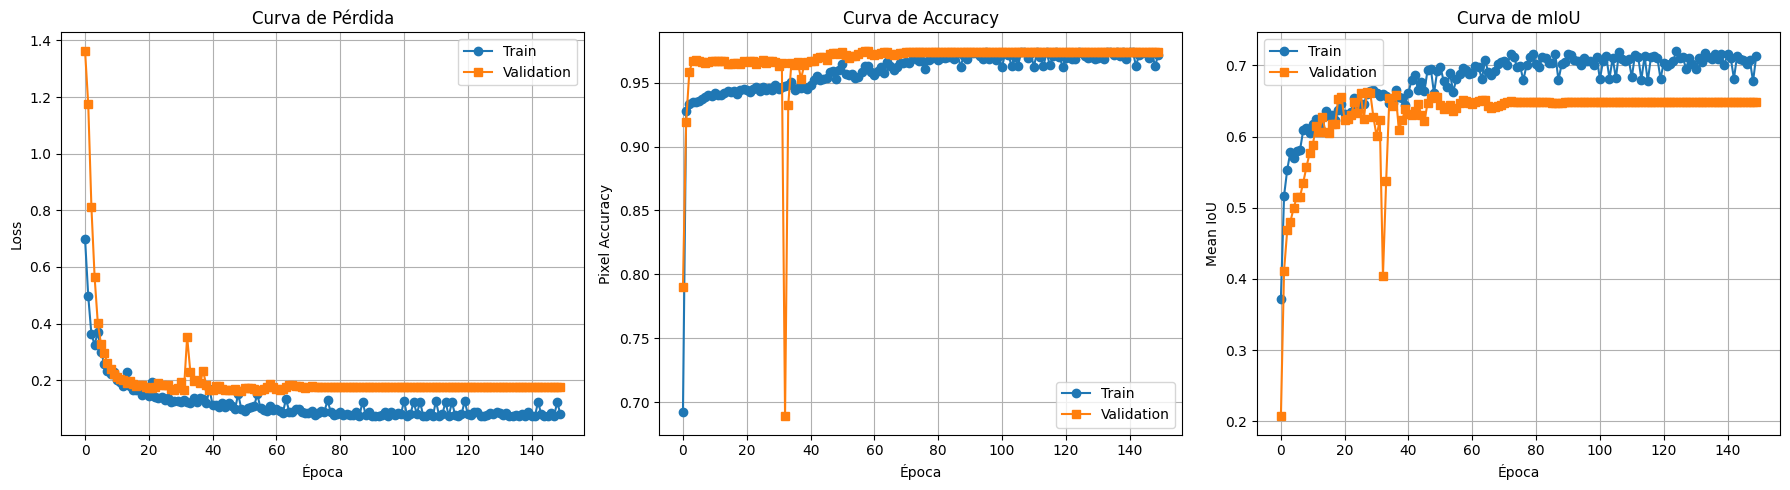

✅ Curvas de entrenamiento guardadas en: training_curves.png


In [15]:
# ============================================================================
# CELDA 6: BUCLE PRINCIPAL DE ENTRENAMIENTO
# ============================================================================
import torch
import gc

# Limpiar basura de Python
gc.collect()

# Limpiar caché de la GPU
torch.cuda.empty_cache()
# Historial de métricas
history = {
    'train_loss': [],
    'train_acc': [],
    'train_miou': [],
    'val_loss': [],
    'val_acc': [],
    'val_miou': []
}

best_val_loss = float('inf')
best_epoch = 0

print(f"\n🚀 Iniciando entrenamiento por {NUM_EPOCHS} épocas...\n")

for epoch in range(NUM_EPOCHS):
    print(f"{'='*70}")
    print(f"Época {epoch + 1}/{NUM_EPOCHS}")
    print(f"{'='*70}")
    
    # Entrenamiento
    train_metrics = train_epoch(model, train_loader, criterion, optimizer, DEVICE)
    
    # Validación
    val_metrics = validate_epoch(model, val_loader, criterion, DEVICE)
    
    # Actualizar scheduler
    scheduler.step(val_metrics['loss'])
    
    # Guardar historial
    history['train_loss'].append(train_metrics['loss'])
    history['train_acc'].append(train_metrics['accuracy'])
    history['train_miou'].append(train_metrics['mIoU'])
    history['val_loss'].append(val_metrics['loss'])
    history['val_acc'].append(val_metrics['accuracy'])
    history['val_miou'].append(val_metrics['mIoU'])
    
    # Imprimir resumen de época
    print(f"\n📊 Resumen Época {epoch + 1}:")
    print(f"   Train - Loss: {train_metrics['loss']:.4f}, "
          f"Acc: {train_metrics['accuracy']:.4f}, "
          f"mIoU: {train_metrics['mIoU']:.4f}")
    print(f"   Val   - Loss: {val_metrics['loss']:.4f}, "
          f"Acc: {val_metrics['accuracy']:.4f}, "
          f"mIoU: {val_metrics['mIoU']:.4f}")
    
    # Guardar mejor modelo
    if val_metrics['loss'] < best_val_loss:
        best_val_loss = val_metrics['loss']
        best_epoch = epoch + 1
        torch.save(model.state_dict(), 'best_model.pth')
        print(f"   ✅ Mejor modelo guardado! (Val Loss: {best_val_loss:.4f})")
    
    print()

print(f"\n{'='*70}")
print(f"🎉 Entrenamiento completado!")
print(f"{'='*70}")
print(f"Mejor modelo: Época {best_epoch} (Val Loss: {best_val_loss:.4f})")
print(f"Modelo guardado en: best_model.pth")


# Graficar curvas de entrenamiento
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Pérdida
axes[0].plot(history['train_loss'], label='Train', marker='o')
axes[0].plot(history['val_loss'], label='Validation', marker='s')
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Loss')
axes[0].set_title('Curva de Pérdida')
axes[0].legend()
axes[0].grid(True)

# Accuracy
axes[1].plot(history['train_acc'], label='Train', marker='o')
axes[1].plot(history['val_acc'], label='Validation', marker='s')
axes[1].set_xlabel('Época')
axes[1].set_ylabel('Pixel Accuracy')
axes[1].set_title('Curva de Accuracy')
axes[1].legend()
axes[1].grid(True)

# mIoU
axes[2].plot(history['train_miou'], label='Train', marker='o')
axes[2].plot(history['val_miou'], label='Validation', marker='s')
axes[2].set_xlabel('Época')
axes[2].set_ylabel('Mean IoU')
axes[2].set_title('Curva de mIoU')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.savefig('training_curves.png', dpi=150)
plt.show()

print("✅ Curvas de entrenamiento guardadas en: training_curves.png")



🖼️ Generando visualizaciones...


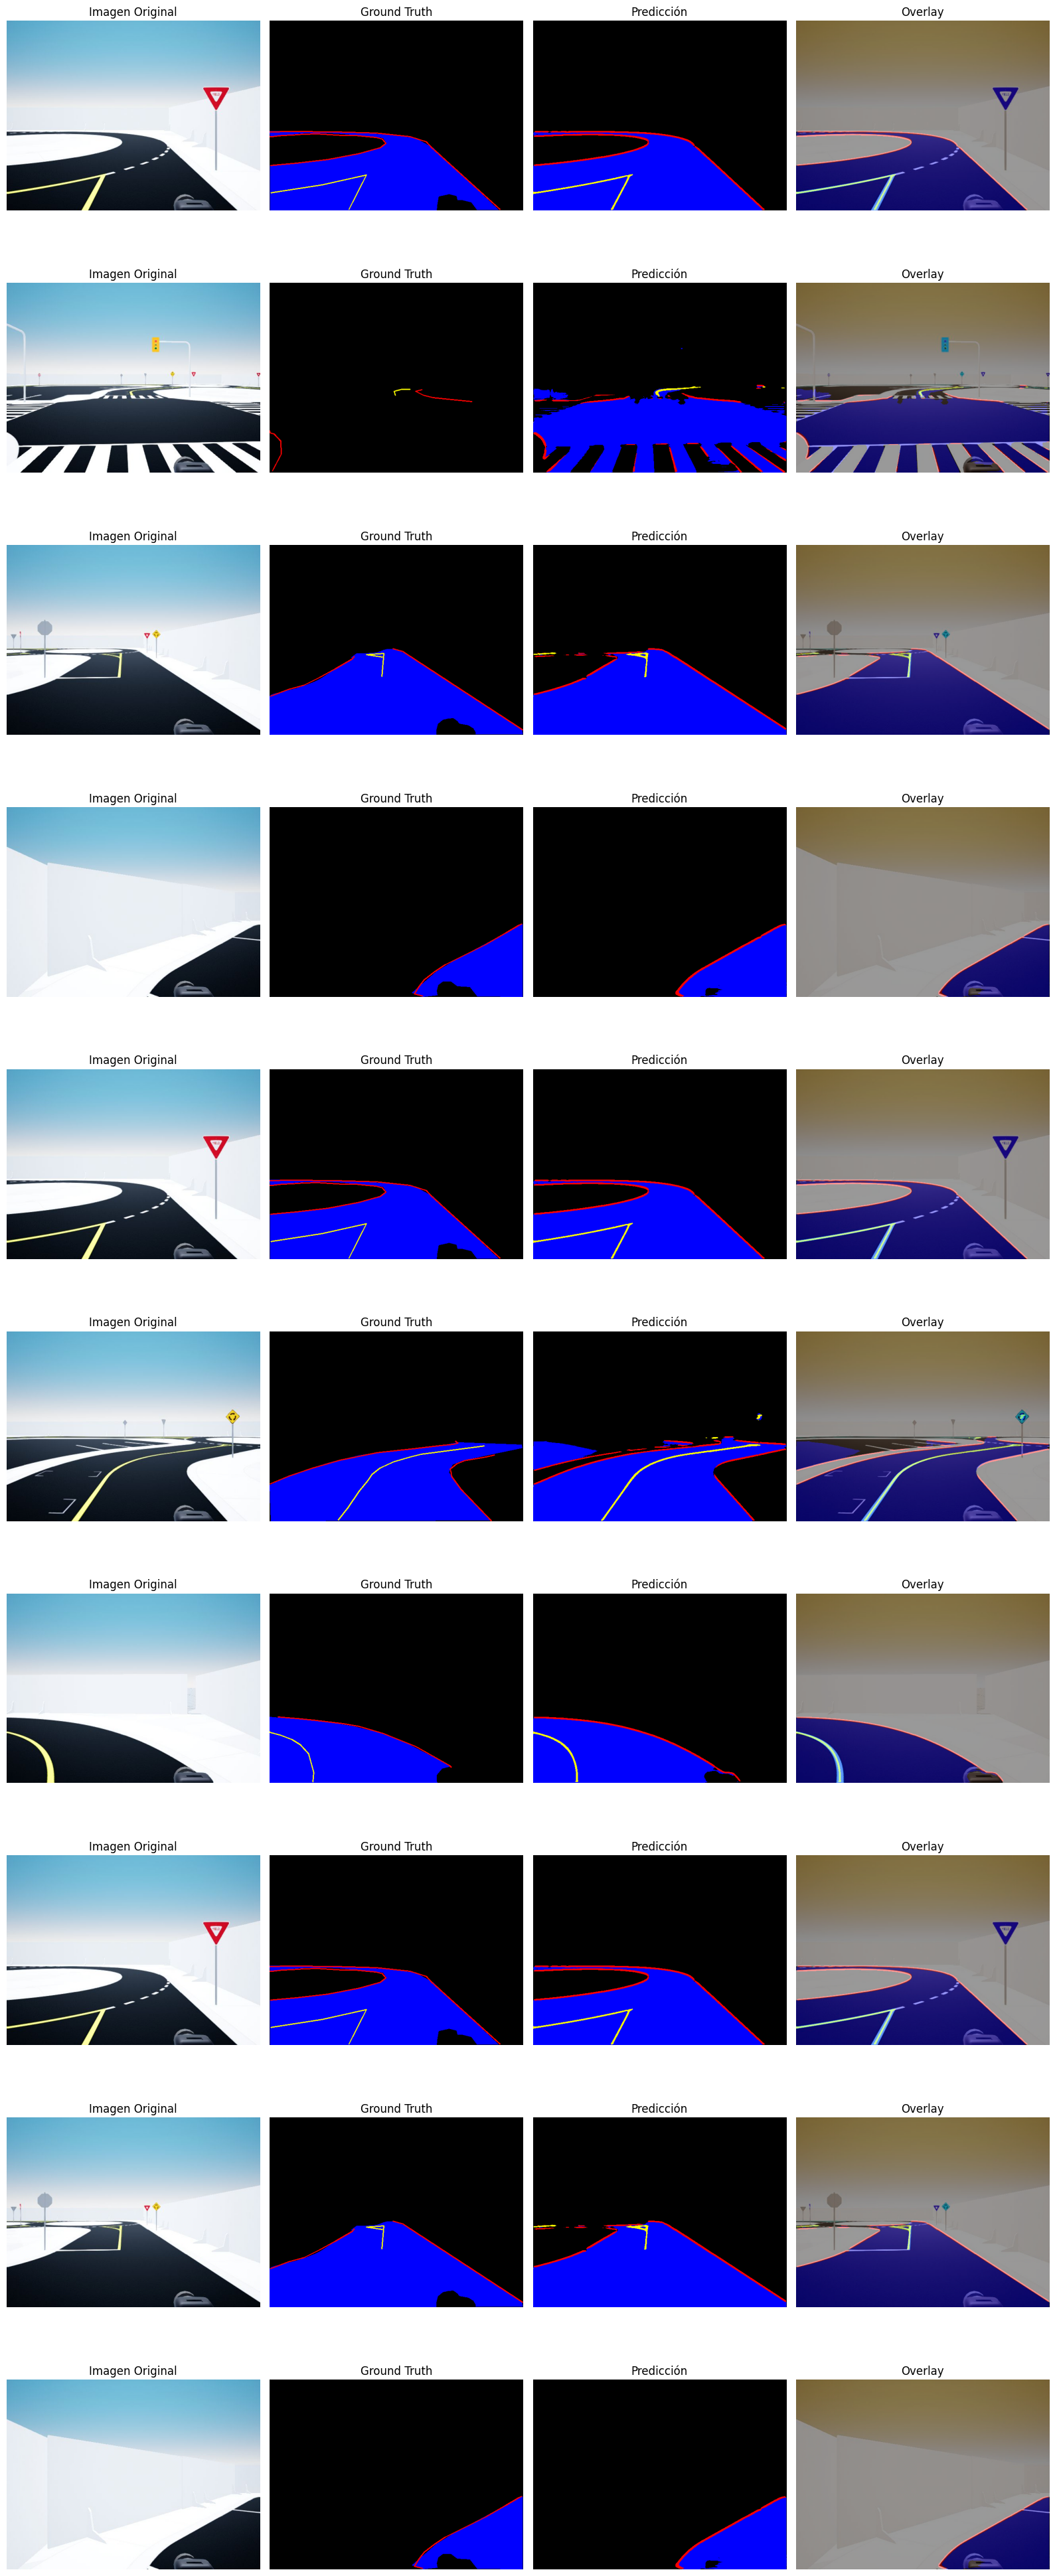

✅ Visualizaciones guardadas en: predictions_visualization.png


In [16]:
# ============================================================================
# CELDA 7: VISUALIZACIÓN DE RESULTADOS
# ============================================================================

# Cargar mejor modelo
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

# Colores para cada clase (BGR para OpenCV)
COLORS = {
    0: (0, 0, 0),       # Fondo/Vereda/Obstáculos - Negro
    1: (255, 0, 0),     # Camino/Asfalto - Azul
    2: (0, 255, 255),   # Líneas - Amarillo
    3: (0, 0, 255)      # Bordes - Rojo
}


def mask_to_color(mask, colors=COLORS):
    """Convierte máscara de clases a imagen RGB coloreada."""
    h, w = mask.shape
    color_mask = np.zeros((h, w, 3), dtype=np.uint8)
    
    for class_id, color in colors.items():
        color_mask[mask == class_id] = color
    
    return color_mask


def visualize_predictions(model, dataset, device, num_samples=4):
    """Visualiza predicciones del modelo vs ground truth."""
    model.eval()
    
    indices = np.random.choice(len(dataset), num_samples, replace=True)
    
    fig, axes = plt.subplots(num_samples, 4, figsize=(16, 4 * num_samples))
    
    with torch.no_grad():
        for i, idx in enumerate(indices):
            image, mask = dataset[idx]
            
            # Predicción
            image_tensor = image.unsqueeze(0).to(device)
            output = model(image_tensor)
            pred_mask = torch.argmax(output, dim=1).squeeze().cpu().numpy()
            
            # Convertir imagen para visualización
            image_np = image.permute(1, 2, 0).numpy()
            image_np = (image_np * 255).astype(np.uint8)
            
            # Máscaras coloreadas
            mask_np = mask.numpy()
            gt_colored = mask_to_color(mask_np)
            pred_colored = mask_to_color(pred_mask)
            
            # Overlay de predicción sobre imagen
            overlay = cv2.addWeighted(image_np, 0.6, pred_colored, 0.4, 0)
            
            # Mostrar
            axes[i, 0].imshow(image_np)
            axes[i, 0].set_title('Imagen Original')
            axes[i, 0].axis('off')
            
            axes[i, 1].imshow(cv2.cvtColor(gt_colored, cv2.COLOR_BGR2RGB))
            axes[i, 1].set_title('Ground Truth')
            axes[i, 1].axis('off')
            
            axes[i, 2].imshow(cv2.cvtColor(pred_colored, cv2.COLOR_BGR2RGB))
            axes[i, 2].set_title('Predicción')
            axes[i, 2].axis('off')
            
            axes[i, 3].imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
            axes[i, 3].set_title('Overlay')
            axes[i, 3].axis('off')
    
    plt.tight_layout()
    plt.savefig('predictions_visualization.png', dpi=150)
    plt.show()
    
    print("✅ Visualizaciones guardadas en: predictions_visualization.png")


# Visualizar predicciones en conjunto de validación
print("\n🖼️ Generando visualizaciones...")
visualize_predictions(model, train_dataset, DEVICE, num_samples=10)


Example Path: qcar2_LaneSeg-ACC/train_unet/training_data/raw_images/
🔎 Se encontraron 408 imágenes. Seleccionando 10 al azar...

[1/10] Procesando: img_1768882941161.png


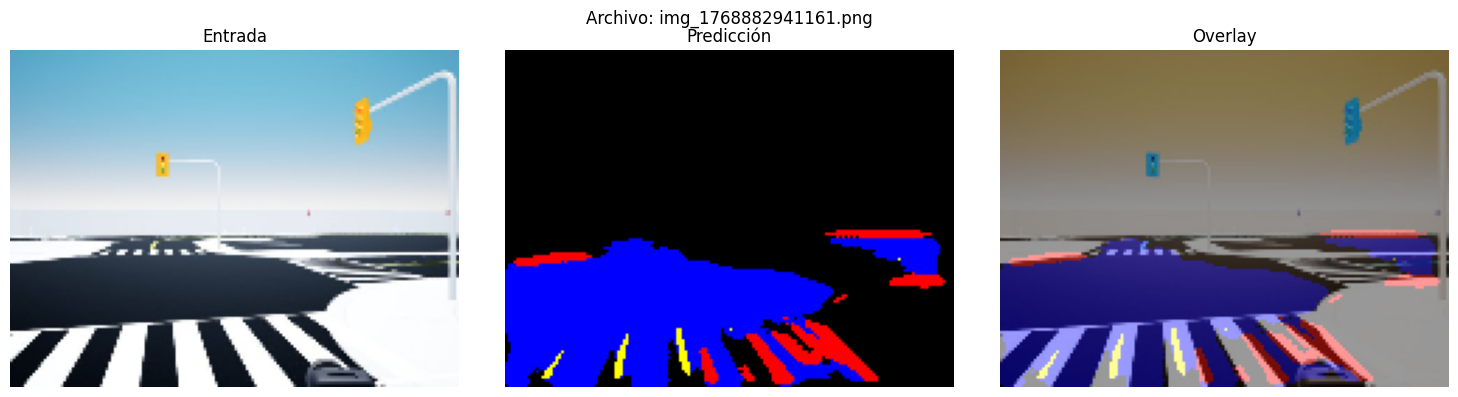

[2/10] Procesando: img_1769111071930.png


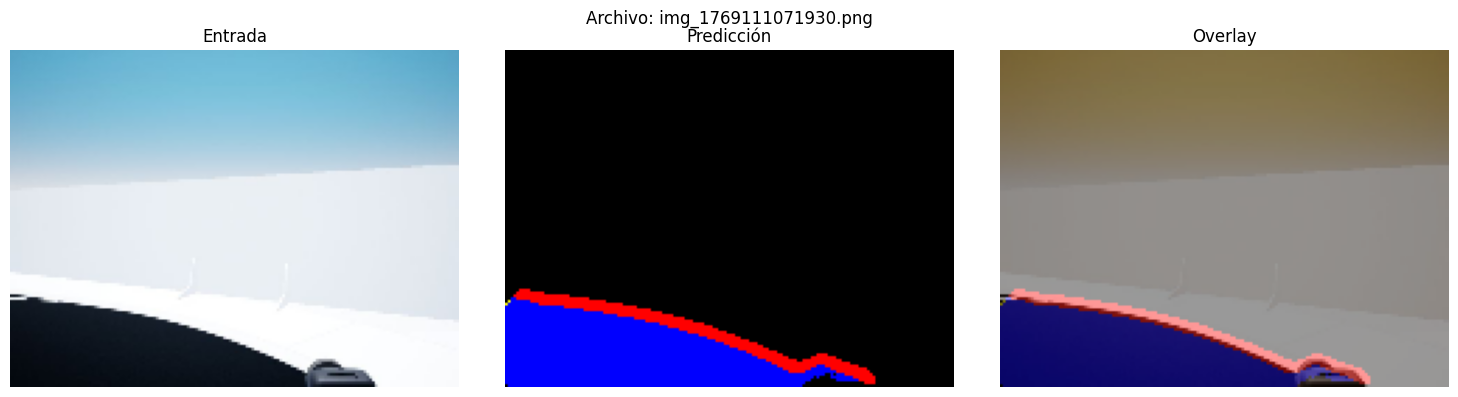

[3/10] Procesando: img_1768883007415.png


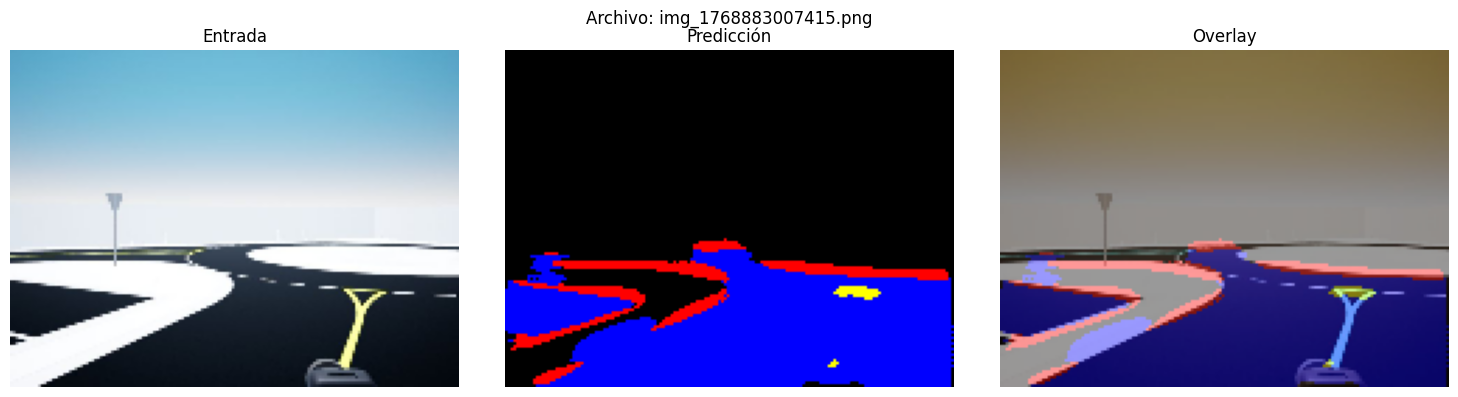

[4/10] Procesando: img_1768883045289.png


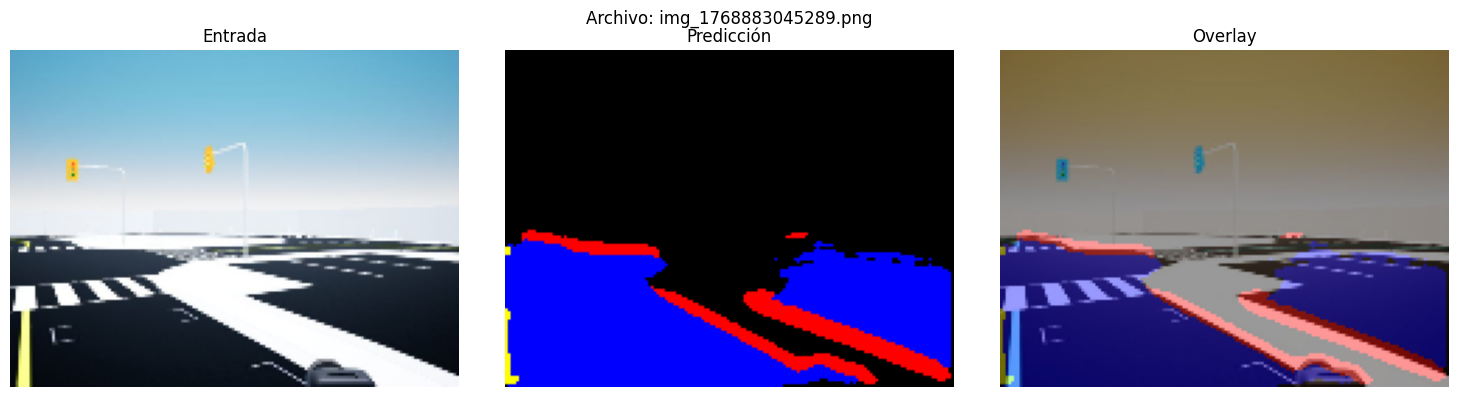

[5/10] Procesando: img_1768883018692.png


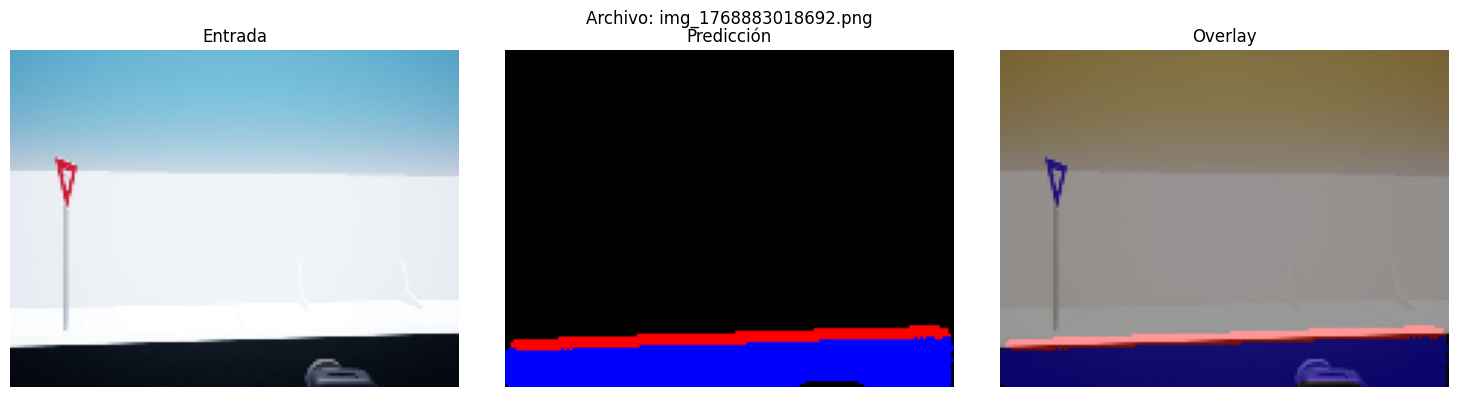

[6/10] Procesando: img_1768883052485.png


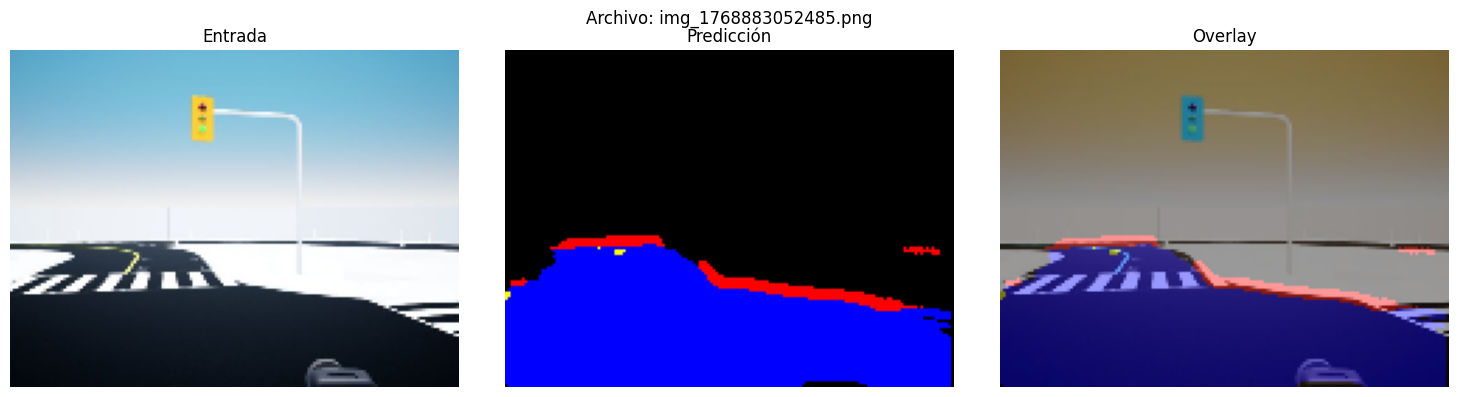

[7/10] Procesando: img_1768883070875.png


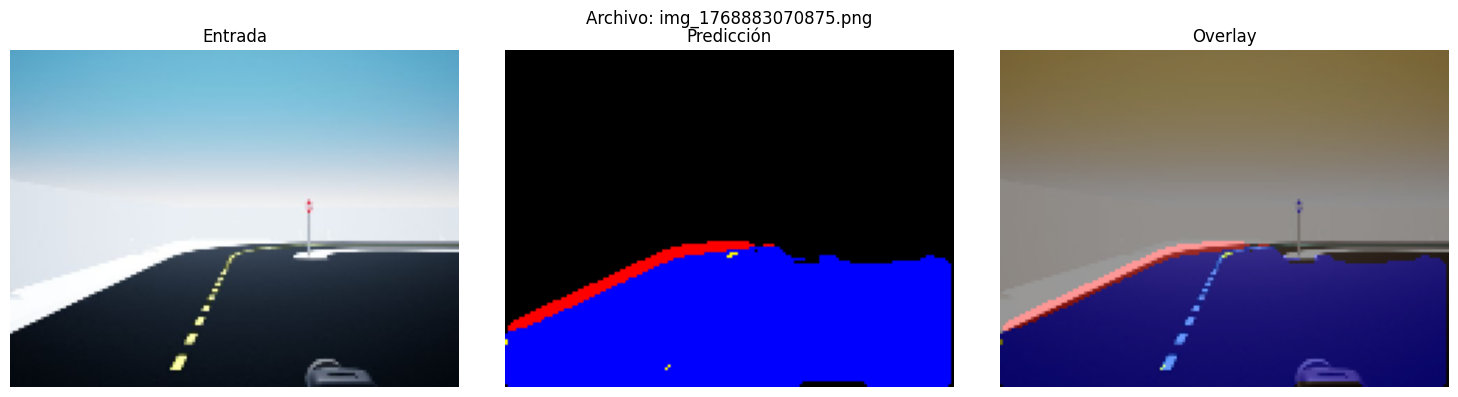

[8/10] Procesando: img_1768882948304.png


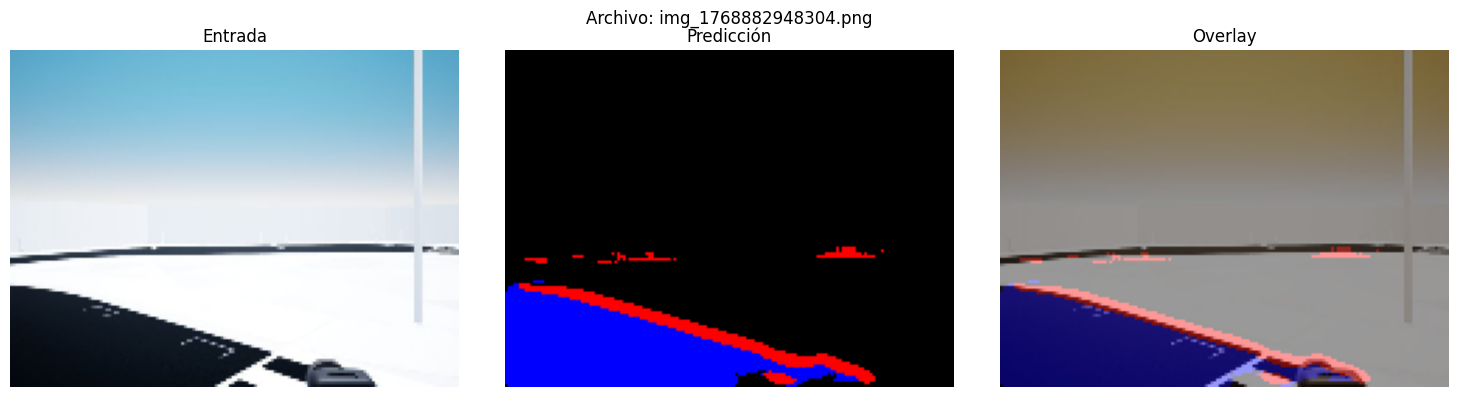

[9/10] Procesando: img_1768882881197.png


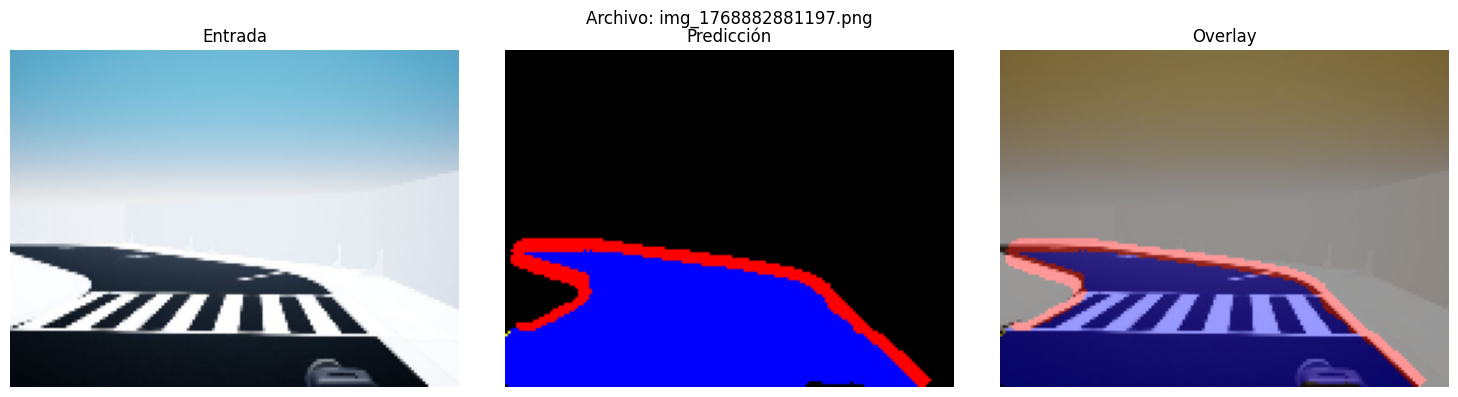

[10/10] Procesando: img_1769108964822.png


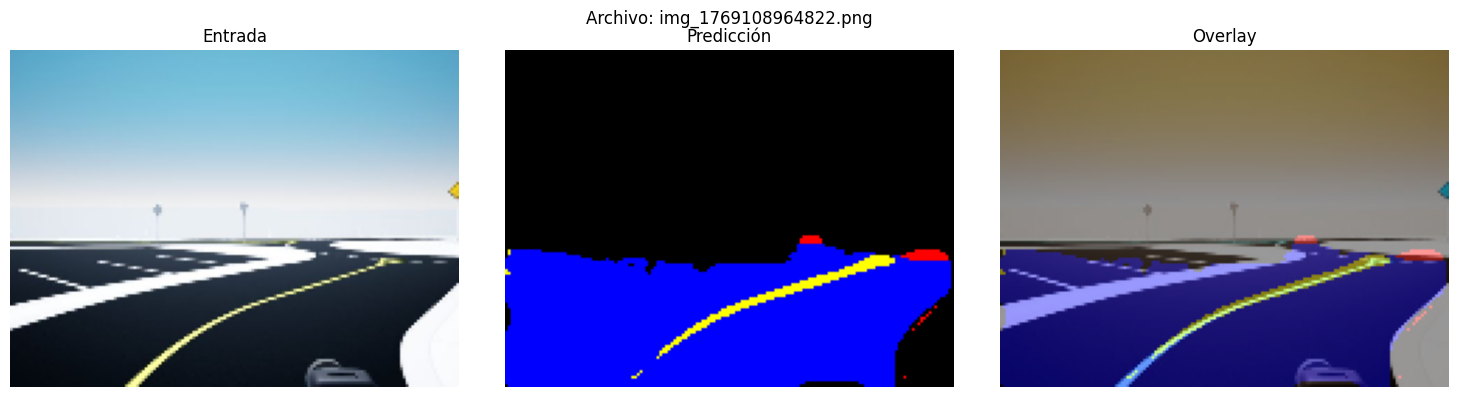

In [17]:
# ============================================================================
# CELDA 8: INFERENCIA ALEATORIA EN LOTE (BATCH INFERENCE)
# ============================================================================
import os
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
import random

# ---------------- CONFIGURACIÓN ----------------
# 1. Ruta de la CARPETA donde están las imágenes (sin el nombre del archivo)
IMAGES_DIR = "qcar2_LaneSeg-ACC/train_unet/training_data/raw_images/"

# 2. ¿Cuántas imágenes al azar quieres probar?
NUM_SAMPLES = 10

# 3. Tamaño usado en el entrenamiento (Ancho, Alto)
TARGET_SIZE = (160, 120) 
# -----------------------------------------------

def predict_custom_image(image_path, model, device, target_size):
    """
    Carga una imagen, la procesa y muestra la segmentación.
    """
    if not os.path.exists(image_path):
        print(f"❌ Error: No se encontró: {image_path}")
        return

    # --- Preprocesamiento ---
    image_bgr = cv2.imread(image_path)
    if image_bgr is None:
        print(f"❌ Error al leer imagen (formato incorrecto?): {image_path}")
        return
        
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image_rgb, target_size)
    
    # Normalizar y convertir a Tensor
    image_tensor = torch.from_numpy(image_resized).permute(2, 0, 1).float() / 255.0
    image_tensor = image_tensor.unsqueeze(0).to(device)

    # --- Inferencia ---
    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        pred_mask = torch.argmax(output, dim=1).squeeze().cpu().numpy()

    # --- Visualización ---
    image_display = image_resized.astype(np.uint8)
    
    # Nota: Asegúrate de haber ejecutado la celda donde defines mask_to_color y COLORS
    try:
        pred_colored = mask_to_color(pred_mask) 
    except NameError:
        print("⚠️ Error: La función 'mask_to_color' no está definida. Ejecuta la celda anterior.")
        return

    overlay = cv2.addWeighted(image_display, 0.6, pred_colored, 0.4, 0)

    # Graficar
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    fig.suptitle(f"Archivo: {os.path.basename(image_path)}", fontsize=12)
    
    axes[0].imshow(image_display)
    axes[0].set_title('Entrada')
    axes[0].axis('off')
    
    axes[1].imshow(cv2.cvtColor(pred_colored, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Predicción')
    axes[1].axis('off')
    
    axes[2].imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    axes[2].set_title('Overlay')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

# --- LÓGICA DE SELECCIÓN ALEATORIA ---
def run_random_batch_inference():
    if not os.path.exists(IMAGES_DIR):
        print(f"❌ La carpeta no existe: {IMAGES_DIR}")
        return

    # 1. Listar archivos de imagen válidos
    valid_extensions = ('.png', '.jpg', '.jpeg', '.bmp')
    all_files = [f for f in os.listdir(IMAGES_DIR) if f.lower().endswith(valid_extensions)]
    
    total_images = len(all_files)
    if total_images == 0:
        print(f"⚠️ No se encontraron imágenes en: {IMAGES_DIR}")
        return

    # 2. Seleccionar muestras
    # Si hay menos imágenes que las pedidas, usamos todas las disponibles
    n_to_select = min(NUM_SAMPLES, total_images)
    selected_files = random.sample(all_files, n_to_select)

    print(f"Example Path: {IMAGES_DIR}")
    print(f"🔎 Se encontraron {total_images} imágenes. Seleccionando {n_to_select} al azar...\n")

    # 3. Iterar e inferir
    for i, filename in enumerate(selected_files):
        full_path = os.path.join(IMAGES_DIR, filename)
        print(f"[{i+1}/{n_to_select}] Procesando: {filename}")
        predict_custom_image(full_path, model, DEVICE, TARGET_SIZE)

# Ejecutar
run_random_batch_inference()

In [18]:
# ============================================================================
# CELDA 9: EXPORTACIÓN A ONNX
# ============================================================================

print("\n📦 Exportando modelo a formato ONNX...")

# Cargar mejor modelo
model.load_state_dict(torch.load('best_model.pth'))
model.eval()
model.to(DEVICE)

# Crear tensor de entrada dummy (batch_size=1, canales=3, H=480, W=640)
dummy_input = torch.randn(1, 3, IMAGE_HEIGHT, IMAGE_WIDTH).to(DEVICE)

# Nombre del archivo ONNX
onnx_path = 'lane_unet.onnx'

# Exportar a ONNX
torch.onnx.export(
    model,                          # Modelo a exportar
    dummy_input,                    # Entrada de ejemplo
    onnx_path,                      # Ruta de salida
    export_params=True,             # Exportar parámetros entrenados
    opset_version=11,               # Versión ONNX (compatible con Isaac ROS)
    do_constant_folding=True,       # Optimización
    input_names=['input_tensor'],   # Nombre del tensor de entrada
    output_names=['output_tensor'], # Nombre del tensor de salida
    dynamic_axes={                  # Ejes dinámicos (batch size variable)
        'input_tensor': {0: 'batch_size'},
        'output_tensor': {0: 'batch_size'}
    }
)

print(f"✅ Modelo exportado exitosamente a: {onnx_path}")
print(f"\nEspecificaciones del modelo ONNX:")
print(f"   - Input shape: (batch_size, 3, {IMAGE_HEIGHT}, {IMAGE_WIDTH})")
print(f"   - Output shape: (batch_size, {NUM_CLASSES}, {IMAGE_HEIGHT}, {IMAGE_WIDTH})")
print(f"   - Input name: 'input_tensor'")
print(f"   - Output name: 'output_tensor'")
print(f"   - Opset version: 11")
print(f"\n🎯 Listo para Isaac ROS!")


# Verificar archivo ONNX (opcional, requiere onnx library)
try:
    import onnx
    
    onnx_model = onnx.load(onnx_path)
    onnx.checker.check_model(onnx_model)
    
    print("\n✅ Verificación ONNX exitosa:")
    print(f"   - Archivo válido")
    print(f"   - Tamaño: {os.path.getsize(onnx_path) / (1024*1024):.2f} MB")
    
except ImportError:
    print("\n⚠️ onnx library no instalada, saltando verificación")
    print("   Para verificar: pip install onnx")


print("\n" + "="*70)
print("✨ PROCESO COMPLETADO ✨")
print("="*70)
print("\nArchivos generados:")
print("  ✓ best_model.pth - Modelo PyTorch entrenado")
print("  ✓ lane_unet.onnx - Modelo ONNX para Isaac ROS")
print("  ✓ training_curves.png - Curvas de entrenamiento")
print("  ✓ predictions_visualization.png - Visualizaciones de predicciones")
print("\nPróximos pasos:")
print("  1. Validar modelo ONNX con TensorRT")
print("  2. Integrar con Isaac ROS")
print("  3. Probar en QCar2")



📦 Exportando modelo a formato ONNX...
✅ Modelo exportado exitosamente a: lane_unet.onnx

Especificaciones del modelo ONNX:
   - Input shape: (batch_size, 3, 480, 640)
   - Output shape: (batch_size, 4, 480, 640)
   - Input name: 'input_tensor'
   - Output name: 'output_tensor'
   - Opset version: 11

🎯 Listo para Isaac ROS!

✅ Verificación ONNX exitosa:
   - Archivo válido
   - Tamaño: 50.74 MB

✨ PROCESO COMPLETADO ✨

Archivos generados:
  ✓ best_model.pth - Modelo PyTorch entrenado
  ✓ lane_unet.onnx - Modelo ONNX para Isaac ROS
  ✓ training_curves.png - Curvas de entrenamiento
  ✓ predictions_visualization.png - Visualizaciones de predicciones

Próximos pasos:
  1. Validar modelo ONNX con TensorRT
  2. Integrar con Isaac ROS
  3. Probar en QCar2
